# Банки — Анализ оттока клиентов

## Введение
Проект направлен на проведение исследовательского анализа данных клиентов банка с целью определения ключевых факторов, влияющих на отток клиентов, и формирования рекомендаций по снижению уровня оттока. Основная задача исследования — выявить значимые признаки, которые предсказывают уход клиентов, и предложить стратегии для удержания наиболее уязвимых сегментов.

Для этого будет выполнен анализ различных характеристик клиентов, таких как доход, возраст, балансовые показатели и другие, с целью выявления закономерностей, связанных с повышенным риском оттока. Будет произведено сравнение профилей клиентов, склонных к уходу, с теми, кто остается в банке, а также сформулированы и проверены статистические гипотезы для более глубокого понимания факторов, влияющих на отток.

Результаты анализа позволят выделить ключевые клиентские сегменты, наиболее подверженные риску оттока, а также предложить конкретные рекомендации по каждому сегменту для улучшения клиентской стратегии банка.

## Презентация

https://disk.yandex.ru/i/_iF1uKcfUsHzyw

## Загрузка, предобработка и анализ данных

### Импорт библиотек

In [ ]:
#pip install missingno

In [ ]:
#pip install phik

In [ ]:
#pip install --upgrade plotly

In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import phik
import plotly.express as px
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene, normaltest
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Чтение данных

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [ ]:
df

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0


In [ ]:
num_rows_0 = df.shape[0]
print(f"Количество строк в датафрейме: {num_rows_0}")

Количество строк в датафрейме: 10000


### Вывод
После получения информации о структуре таблицы, можно сделать следующие выводы:   

Типы данных:  
- Таблица содержит 12 столбцов, включая числовые, строковые и категориальные данные.
- Типы данных столбцов представлены как float64, int64 и object, что соответствует ожидаемым типам для количественных и категориальных переменных.
- Столбцы score, age, balance, и EST_SALARY имеют тип float64, что указывает на вещественные числовые значения.
- Категориальные данные, такие как city и gender, представлены как тип object, что также корректно.

Пропущенные значения:  
- Пропуски присутствуют в столбцах age и balance:
- В столбце age отсутствуют данные для 26 записей (9974 из 10000 непустые значения).
- В столбце balance наблюдается большее количество пропусков — 2295 записей содержат отсутствующие значения (7705 из 10000 непустые значения).  
Работа с дубликатами и пропущенными значениями будет детально разобрана в следующих этапах анализа. Необходимо будет выяснить причины возникновения пропусков, их влияние на исследование и возможные способы обработки.

### Корректировка столбцов

In [ ]:
df = df.rename(columns={'USERID': 'user_id'})
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Анализ дубликатов

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['user_id'].duplicated().sum()

73

In [ ]:
df[df.duplicated(subset='user_id', keep=False)].sort_values(by='user_id', ascending=True)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.00,Рыбинск,Ж,55.00,1,"362,756.49",3,0,1,"175,920.48",1
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,"119,247.61",0
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,"137,718.93",0
4866,117943,855.00,Рыбинск,Ж,32.00,6,"1,036,832.93",4,1,1,"107,792.71",1
5896,120258,905.00,Ярославль,М,30.00,0,NaN,1,1,1,"146,427.96",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.00,Ярославль,М,37.00,4,"14,648,692.14",2,0,0,"934,412.61",1
8205,227795,840.00,Рыбинск,М,34.00,2,"350,768.03",1,1,0,"102,036.14",1
8497,227795,839.00,Ярославль,М,34.00,2,"326,593.14",2,1,0,"103,314.92",0
6457,228075,839.00,Рыбинск,М,39.00,5,"507,199.85",3,0,1,"85,195.80",0


Имеются дубликаты записей с одинаковыми значениями `user_id`, всего таких 146 строк. Так как это всего 1,46 % от исходных данных и дубликаты имеют случайную природу, то это не скажется на исследовании и можно оставить их.


### Кодировка столбцов

In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender', 'city'], drop_first=False)
df_encoded = df_encoded.rename(columns={
    'gender_Ж': 'gen_w',
    'gender_М': 'gen_m',
    'city_Ростов': 'city_rstv',
    'city_Рыбинск': 'city_rbnsk',
    'city_Ярославль': 'city_yrsvl'
})
df = df_encoded.join(df[['gender', 'city']])
df

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl,gender,city
0,183012,850.00,25.00,1,"59,214.82",2,0,1,"75,719.14",1,True,False,False,True,False,Ж,Рыбинск
1,146556,861.00,37.00,5,"850,594.33",3,1,0,"86,621.77",0,True,False,False,True,False,Ж,Рыбинск
2,120722,892.00,30.00,0,NaN,1,1,1,"107,683.34",0,True,False,False,True,False,Ж,Рыбинск
3,225363,866.00,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,True,False,False,False,True,Ж,Ярославль
4,157978,730.00,34.00,5,174.00,1,1,0,"67,353.16",1,False,True,False,False,True,М,Ярославль
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,27.00,1,"78,144.65",1,0,1,"18,943.64",0,False,True,False,True,False,М,Рыбинск
9996,139170,894.00,46.00,0,NaN,1,1,0,"196,898.29",0,False,True,False,False,True,М,Ярославль
9997,115639,903.00,24.00,0,NaN,2,1,1,"108,905.09",0,False,True,False,False,True,М,Ярославль
9998,148700,777.00,68.00,3,"865,457.97",3,0,1,"86,874.90",0,True,False,False,False,True,Ж,Ярославль


### Анализ пропусков

In [ ]:
df.isna().sum()

,0
user_id,0
score,0
age,26
equity,0
balance,2295
products,0
credit_card,0
last_activity,0
est_salary,0
churn,0


<Axes: >

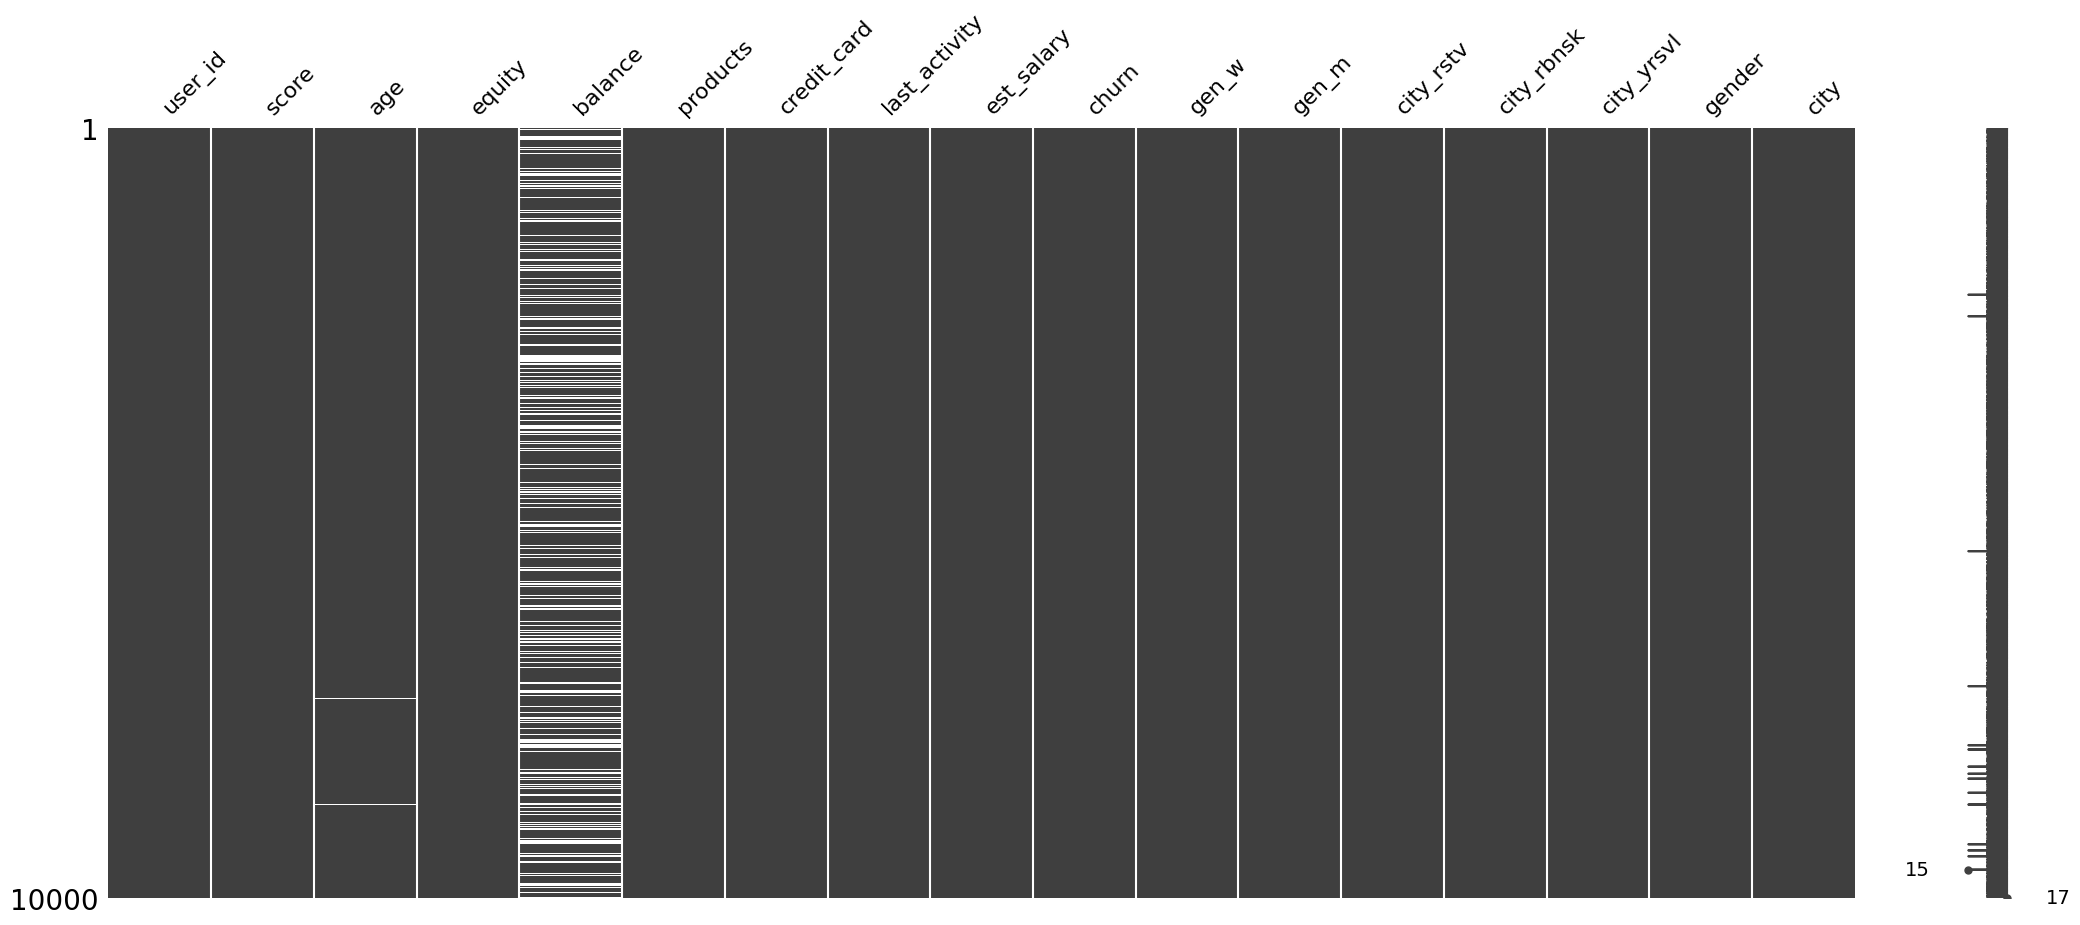

In [ ]:
# визуализация пропусков
msno.matrix(df)

In [ ]:
df[df['age'].isna()]

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl,gender,city
1247,228075,932.00,NaN,5,"7,601,719.20",2,1,1,"408,121.16",0,False,True,False,False,True,М,Ярославль
2165,187635,692.00,NaN,0,NaN,1,1,1,"160,368.82",0,True,False,False,True,False,Ж,Рыбинск
2444,221156,913.00,NaN,0,NaN,1,1,1,"135,693.24",0,False,True,False,False,True,М,Ярославль
3091,138660,836.00,NaN,5,"294,315.53",2,0,1,"63,310.22",1,True,False,True,False,False,Ж,Ростов
4912,210674,834.00,NaN,1,"238,330.52",2,0,1,"93,775.06",0,False,True,False,True,False,М,Рыбинск
5470,218868,827.00,NaN,4,"448,959.07",2,1,1,"67,835.95",0,True,False,False,True,False,Ж,Рыбинск
5495,151662,884.00,NaN,0,NaN,1,1,1,"137,500.77",0,True,False,False,True,False,Ж,Рыбинск
7236,210135,908.00,NaN,4,"1,120,340.31",3,1,1,"85,002.15",0,True,False,False,True,False,Ж,Рыбинск
7248,219343,920.00,NaN,0,NaN,1,1,0,"159,248.67",0,True,False,False,True,False,Ж,Рыбинск
7345,184913,829.00,NaN,3,"188,648.77",2,0,1,"75,206.90",0,True,False,False,False,True,Ж,Ярославль


In [ ]:
# cоздание нового признака для пропусков в столбце 'age'
df_encoded['age_missing'] = df['age'].isna().astype(int)
# cводная таблица по 'age_missing'
pivot_age = df_encoded.pivot_table(values=['gen_m', 'gen_w','score', 'equity', 'balance', 'est_salary', 'city_rstv', 'city_rbnsk', 'city_yrsvl'], index='age_missing', aggfunc='mean')
display(pivot_age)

,balance,city_rbnsk,city_rstv,city_yrsvl,equity,est_salary,gen_m,gen_w,score
age_missing,,,,,,,,,
0,"827,245.59",0.27,0.14,0.59,2.63,"147,786.81",0.50,0.50,848.68
1,"1,250,033.57",0.46,0.04,0.50,1.38,"178,585.20",0.54,0.46,855.15


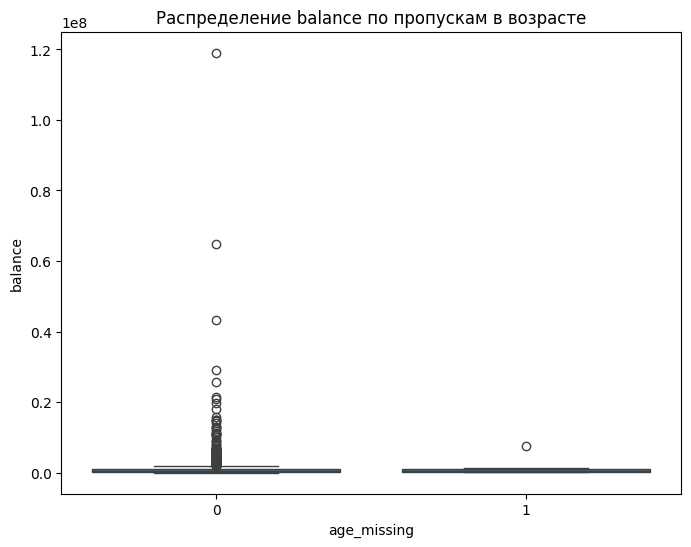

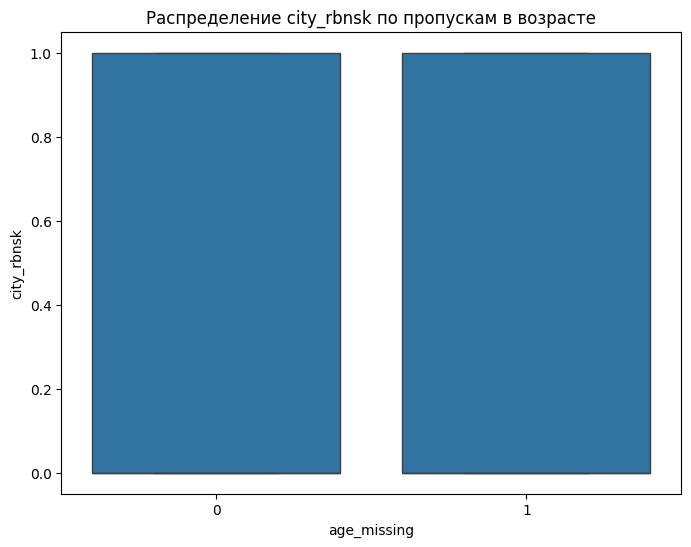

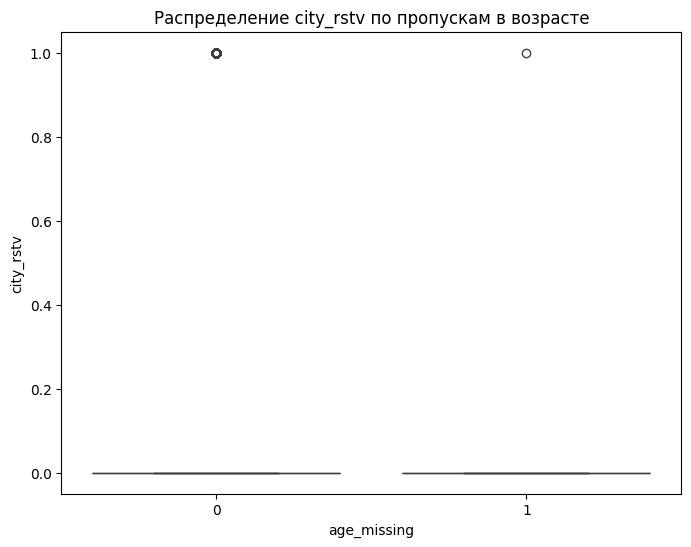

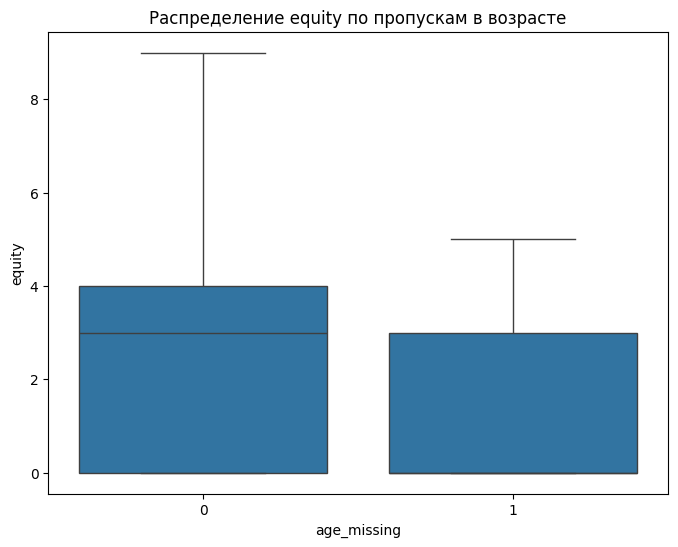

In [ ]:
#отобразим столбцы в которых есть расхождения корреляции
columns_to_plot = ['balance', 'city_rbnsk', 'city_rstv', 'equity']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='age_missing', y=column, data=df_encoded)
    plt.title(f'Распределение {column} по пропускам в возрасте')
    plt.show()

> Всего в датасете пристутствует 26 пропусков в столбце `age`. При анализе признака `age_missing` имеют случайную природу и относятся к категории MCAR. Так как видимой взаимосвязи с другими столбцами нет и объём пропусков от размера датасета составляет всего 2,6%, то строки с пропусками в `age` удалим из датасета

In [ ]:
# cоздание признака для пропусков в столбце 'balance'
df_encoded['balance_missing'] =df_encoded['balance'].isna().astype(int)
# cводная таблица по 'balance_missing'
pivot_balance = df_encoded.pivot_table(values=['gen_m', 'gen_w','score', 'equity', 'age', 'est_salary', 'city_rstv', 'city_rbnsk', 'city_yrsvl'], index='balance_missing', aggfunc='mean')
display(pivot_balance)

,age,city_rbnsk,city_rstv,city_yrsvl,equity,est_salary,gen_m,gen_w,score
balance_missing,,,,,,,,,
0,42.92,0.27,0.15,0.57,3.40,"124,501.87",0.48,0.52,843.74
1,42.09,0.26,0.10,0.64,0.05,"226,310.21",0.56,0.44,865.35


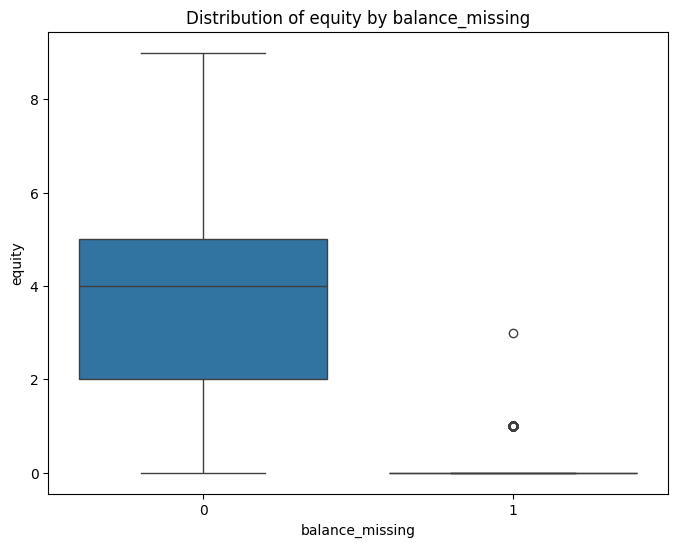

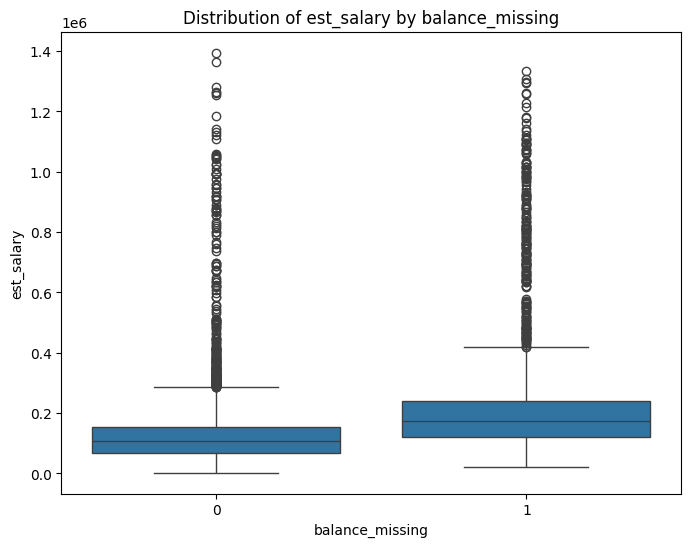

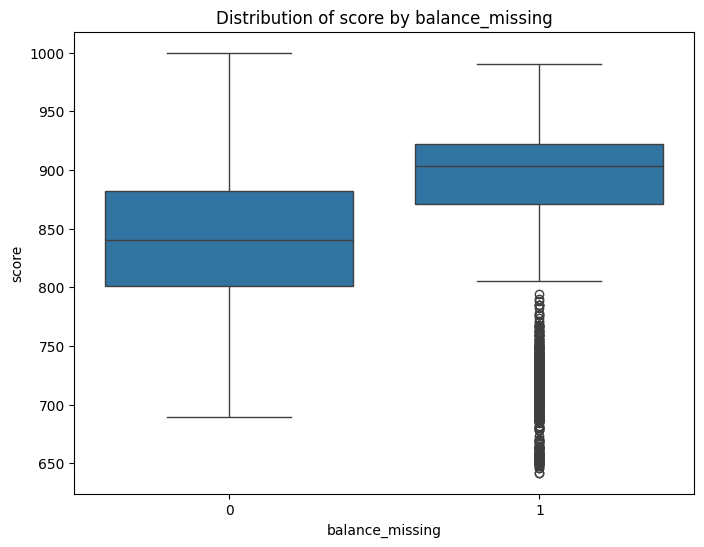

In [ ]:
# Список столбцов, для которых нужно создать графики
columns_to_plot = ['equity', 'est_salary', 'score']

# Цикл по каждому столбцу
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='balance_missing', y=column, data=df_encoded)
    plt.title(f'Distribution of {column} by balance_missing')
    plt.show()

> Пропуски (всего 2295) в столбце `balance` относятся к категории **GMNAR** (Missing Not At Random / Отсутствует не случайно), так как видна взаимосвзять со столбцом `equity`, без дополнительного обоснования такие строки мы не можем отбрасывать или заполнять одним значением, так как это приведёт к заметным искажениям.

### Удаление дубликатов и пропусков

In [ ]:
df = df.dropna(subset=['age'])

### Предобработка данных

In [ ]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,974.00","9,974.00","9,974.00","9,974.00","7,695.00","9,974.00","9,974.00","9,974.00","9,974.00","9,974.00"
mean,"171,755.22",848.68,42.73,2.63,"827,245.59",1.87,0.68,0.52,"147,786.81",0.18
std,"33,695.53",65.40,12.18,1.98,"1,980,327.41",0.79,0.47,0.50,"139,285.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,760.00",802.00,33.00,0.00,"295,698.71",1.00,0.00,0.00,"75,251.66",0.00
50%,"172,643.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,626.79",0.00
75%,"201,163.75",900.00,51.00,4.00,"980,051.21",2.00,1.00,1.00,"174,499.81",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


Так как у клиента банка не может быть 0 продуктов, то избавимся от таких значений

In [ ]:
df = df.query('products != 0')

In [ ]:
df['products'].describe()

,products
count,"9,973.00"
mean,1.87
std,0.79
min,1.00
25%,1.00
50%,2.00
75%,2.00
max,5.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   float64
 2   age            9973 non-null   float64
 3   equity         9973 non-null   int64  
 4   balance        7695 non-null   float64
 5   products       9973 non-null   int64  
 6   credit_card    9973 non-null   int64  
 7   last_activity  9973 non-null   int64  
 8   est_salary     9973 non-null   float64
 9   churn          9973 non-null   int64  
 10  gen_w          9973 non-null   bool   
 11  gen_m          9973 non-null   bool   
 12  city_rstv      9973 non-null   bool   
 13  city_rbnsk     9973 non-null   bool   
 14  city_yrsvl     9973 non-null   bool   
 15  gender         9973 non-null   object 
 16  city           9973 non-null   object 
dtypes: bool(5), float64(4), int64(6), object(2)
memory usage:

In [ ]:
num_rows_1 = df.shape[0]
print(f"Количество строк в датафрейме: {num_rows_1}")
print(f"Целостность от исходного датафрейма: {num_rows_1/num_rows_0 *100}%")

Количество строк в датафрейме: 9973
Целостность от исходного датафрейма: 99.72999999999999%


<div style="border: 2px solid #002366; padding: 5px; border-radius: 5px; color: #002366;">

### Вывод   
- Выполнили импорт CSV
- Исходный размер DF - 10000 строк
- Исправили названия столбцов
- Полных дубликатов строк нет, но обнаружили 73 дубликата в столльце с `id` клиента и впоследствии избавились от строк с такими `id`
- Выполнили **One-Hot Encoding** по столбцам `gender`, `city`
- Проанализировали пропуски и создали столбцы с кодировкой пропусков в столбцах `age` и `balance`
- Всего в датасете присутствуют 26 пропусков в столбце `age`. При анализе признака `age_missing` имеют случайную природу и относятся к категории **MCAR** (Missing Completely At Random / Отсутствует совершенно случайно). Так как видимой взаимосвязи с другими столбцами нет и объём пропусков от размера датасета составляет всего 2,6%, то строки с пропусками в `age` удалим из датасета
- Пропуски (всего 2295) в столбце `balance` относятся к категории **GMNAR** (Missing Not At Random / Отсутствует не случайно), так как видна взаимосвязь со столбцом `equity`, без дополнительного обоснования такие строки мы не можем отбрасывать или заполнять одним значением, так как это приведёт к заметным искажениям.
- После удаления пропусков и дубликатов и предобработки целостность данных 98.5%

## Исследовательский анализ данных

### Изучение данных в колонках

In [ ]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,973.00","9,973.00","9,973.00","9,973.00","7,695.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00"
mean,"171,757.62",848.67,42.73,2.63,"827,245.59",1.87,0.68,0.52,"147,799.12",0.18
std,"33,696.37",65.39,12.18,1.98,"1,980,327.41",0.79,0.47,0.50,"139,287.08",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00
25%,"142,757.00",802.00,33.00,0.00,"295,698.71",1.00,0.00,0.00,"75,252.02",0.00
50%,"172,651.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,643.06",0.00
75%,"201,164.00",900.00,51.00,4.00,"980,051.21",2.00,1.00,1.00,"174,499.96",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


#### `score`

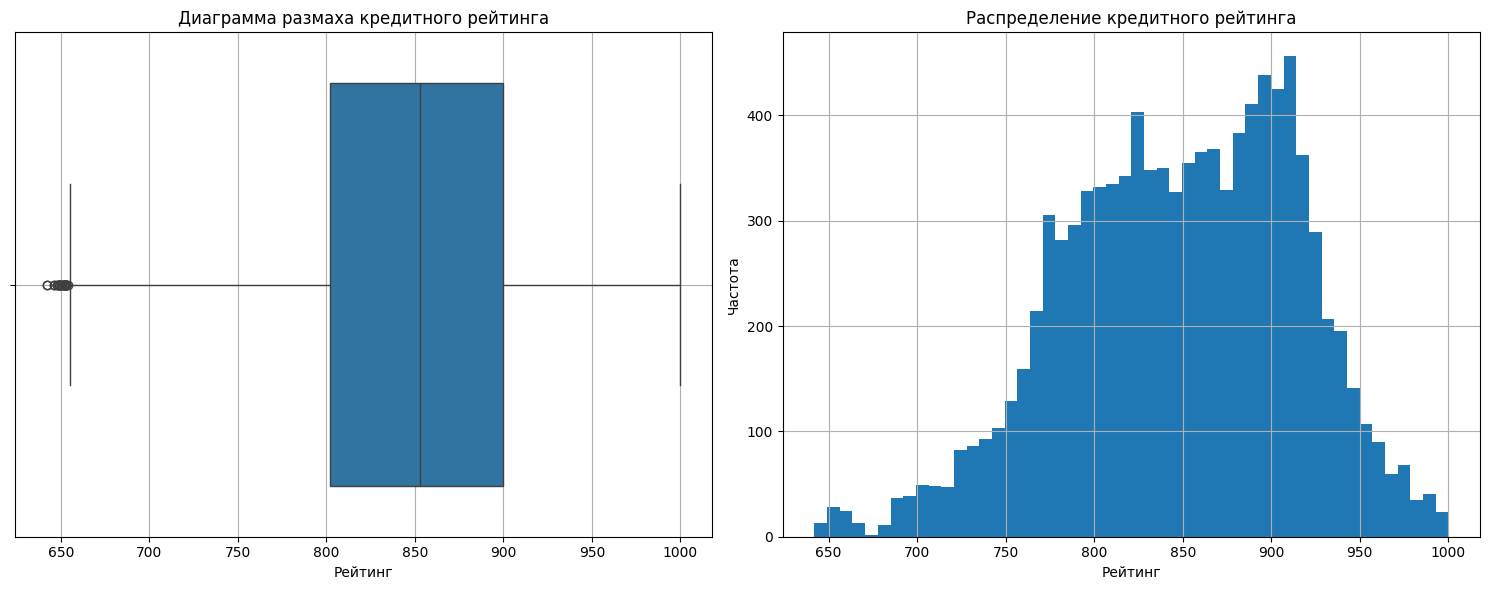

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

# построение ящика с усами
sns.boxplot(x=df['score'], ax=ax1)
ax1.set_title('Диаграмма размаха кредитного рейтинга')
ax1.set_xlabel('Рейтинг')
ax1.grid(True)

# Построение гистограммы
ax2.hist(df['score'], bins=50)
ax2.set_title('Распределение кредитного рейтинга')
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Частота')
ax2.grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()


#### `city`

In [ ]:
df['city'].describe()

,city
count,9973
unique,3
top,Ярославль
freq,5875


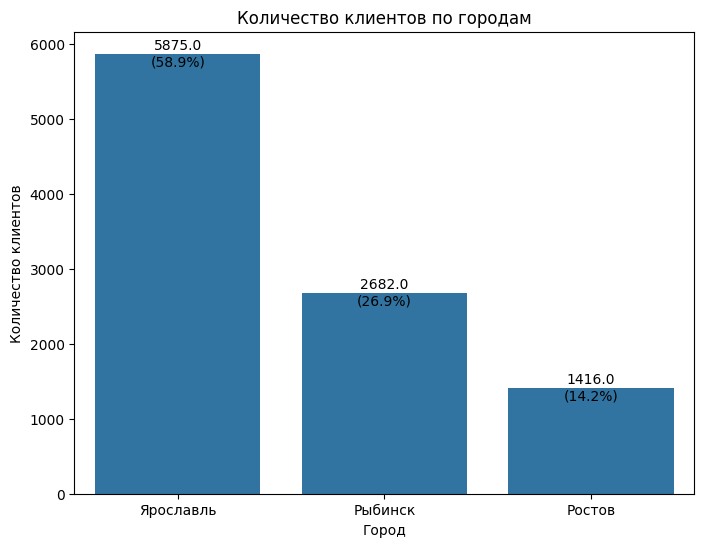

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='city', data=df, order=df['city'].value_counts().index)

# Добавляем заголовок и метки осей
plt.title('Количество клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')


# Получаем частоты и проценты
city_counts = df['city'].value_counts()
total_count = city_counts.sum()

# Добавляем значения и проценты над столбцами
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

plt.show()

#### `gender`

In [ ]:
df['gender'].describe()

,gender
count,9973
unique,2
top,М
freq,4991


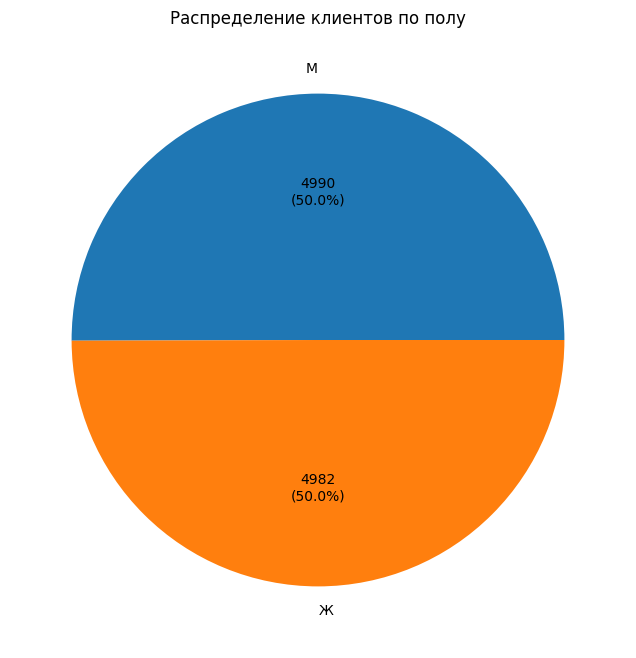

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

plt.figure(figsize=(8, 8))
values = df['gender'].value_counts()
plt.pie(values, labels=values.index, autopct=lambda pct: func(pct, values))
plt.title('Распределение клиентов по полу')
plt.ylabel('')
plt.show()

#### `age`

In [ ]:
df['age'].describe()

,age
count,"9,973.00"
mean,42.73
std,12.18
min,18.00
25%,33.00
50%,40.00
75%,51.00
max,86.00


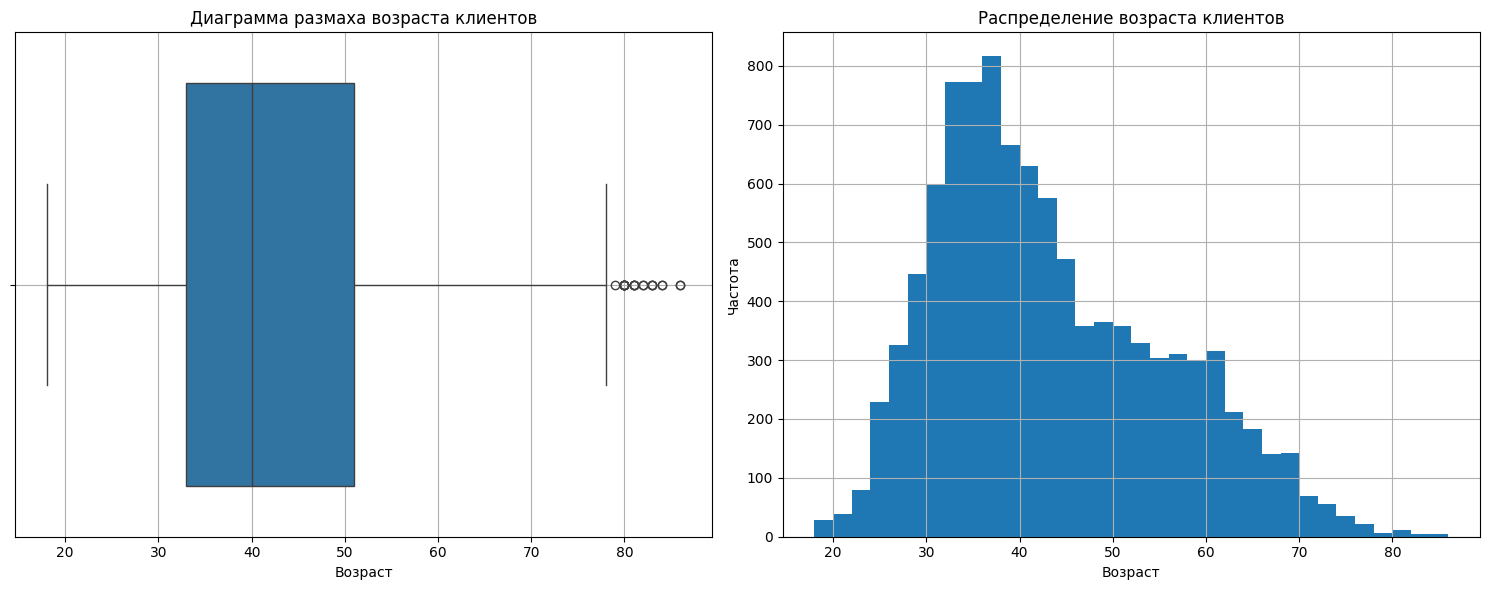

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

# Построение ящика с усами
sns.boxplot(x=df['age'], ax=ax1)
ax1.set_title('Диаграмма размаха возраста клиентов')
ax1.set_xlabel('Возраст')
ax1.grid(True)

# Построение гистограммы
ax2.hist(df['age'], bins=34)
ax2.set_title('Распределение возраста клиентов')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Частота')
ax2.grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()


#### `equity`

In [ ]:
df['equity'].describe()

,equity
count,"9,973.00"
mean,2.63
std,1.98
min,0.00
25%,0.00
50%,3.00
75%,4.00
max,9.00


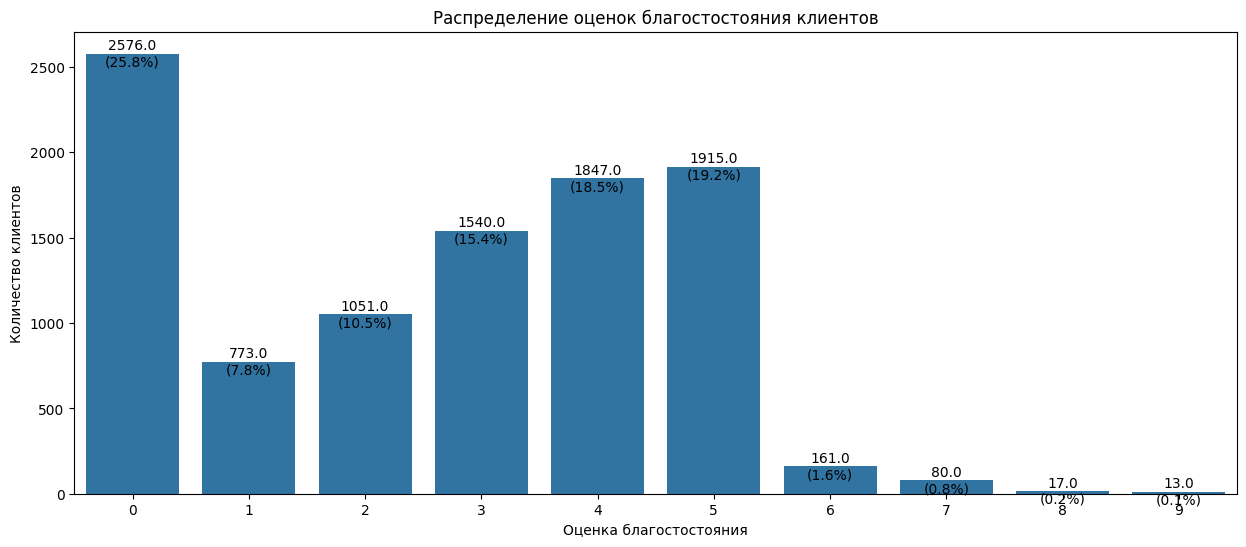

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='equity', data=df)
plt.title('Распределение оценок благостостояния клиентов')
plt.xlabel('Оценка благостостояния')
plt.ylabel('Количество клиентов')
city_counts = df['equity'].value_counts()
total_count = city_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')
plt.show()

Так как в `balance` пропуски влияют на `equity`, то отфильтруем `df` без пропусков

In [ ]:
df1 = df.dropna(subset=['balance'])
df1['equity'].describe()

,equity
count,"7,695.00"
mean,3.39
std,1.58
min,0.00
25%,2.00
50%,4.00
75%,5.00
max,9.00


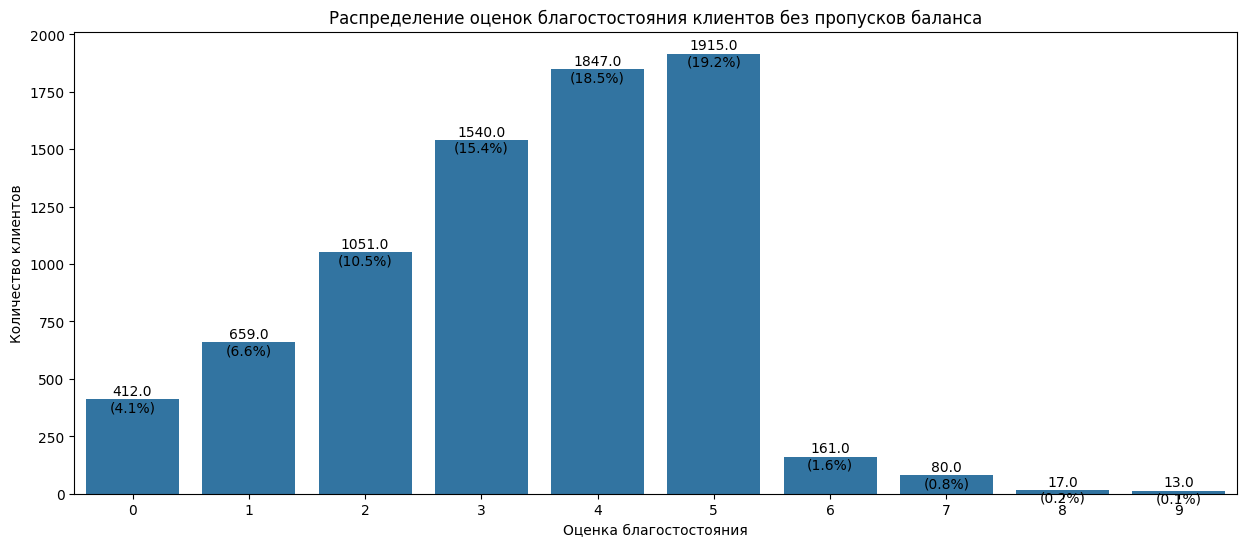

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='equity', data=df1)
plt.title('Распределение оценок благостостояния клиентов без пропусков баланса')
plt.xlabel('Оценка благостостояния')
plt.ylabel('Количество клиентов')
city_counts = df['equity'].value_counts()
total_count = city_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')
plt.show()

#### `balance`

In [ ]:
df['balance'].describe()

,balance
count,"7,695.00"
mean,"827,245.59"
std,"1,980,327.41"
min,0.00
25%,"295,698.71"
50%,"524,295.33"
75%,"980,051.21"
max,"119,113,552.01"


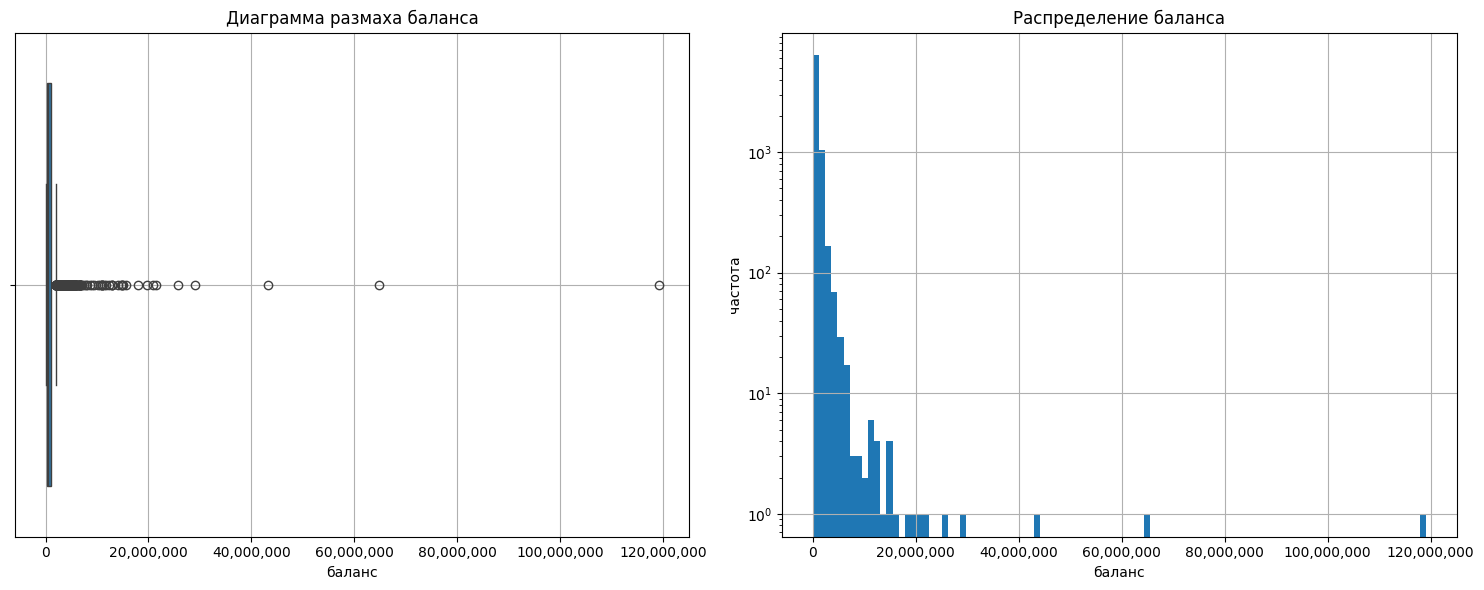

In [ ]:
def formatter_func(x, _):
    return f'{int(x):,}'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df['balance'], ax=ax1)
ax1.set_title('Диаграмма размаха баланса')
ax1.set_xlabel('баланс')
ax1.grid(True)
ax1.xaxis.set_major_formatter(FuncFormatter(formatter_func))  # Применение форматирования

ax2.hist(df['balance'], bins=100, log=True)
ax2.set_title('Распределение баланса')
ax2.set_xlabel('баланс')
ax2.set_ylabel('частота')
ax2.grid(True)
ax2.xaxis.set_major_formatter(FuncFormatter(formatter_func))  # Применение форматирования

plt.tight_layout()
plt.show()

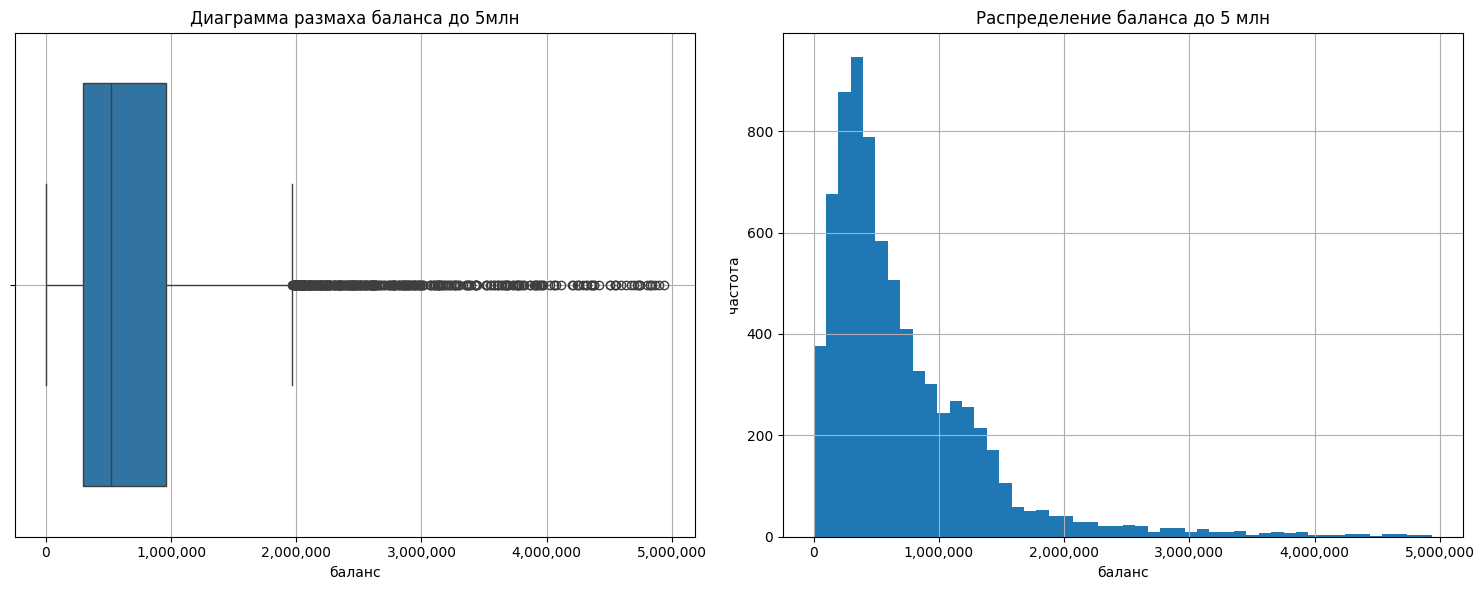

In [ ]:
low_balance_data = df[df['balance'] <= 5000000]

def formatter_func(x, _):
    return f'{int(x):,}'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=low_balance_data['balance'], ax=ax1)
ax1.set_title('Диаграмма размаха баланса до 5млн')
ax1.set_xlabel('баланс')
ax1.grid(True)
ax1.xaxis.set_major_formatter(FuncFormatter(formatter_func))  # Применение форматирования

ax2.hist(low_balance_data['balance'], bins=50)
ax2.set_title('Распределение баланса до 5 млн')
ax2.set_xlabel('баланс')
ax2.set_ylabel('частота')
ax2.grid(True)
ax2.xaxis.set_major_formatter(FuncFormatter(formatter_func))  # Применение форматирования

plt.tight_layout()
plt.show()

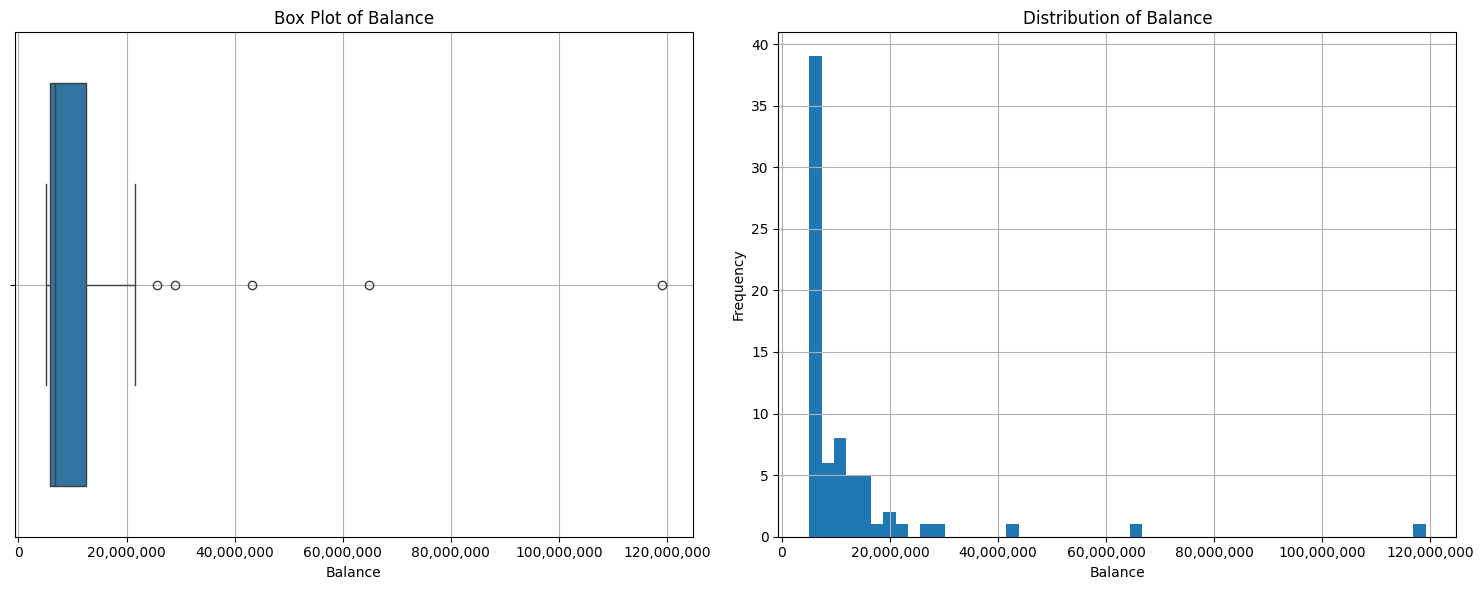

In [ ]:
high_balance_data = df[df['balance'] > 5000000]

def formatter_func(x, _):
    return f'{int(x):,}'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=high_balance_data['balance'], ax=ax1)
ax1.set_title('Box Plot of Balance')
ax1.set_xlabel('Balance')
ax1.grid(True)
ax1.xaxis.set_major_formatter(FuncFormatter(formatter_func))  # Применение форматирования

ax2.hist(high_balance_data['balance'], bins=50)
ax2.set_title('Distribution of Balance')
ax2.set_xlabel('Balance')
ax2.set_ylabel('Frequency')
ax2.grid(True)
ax2.xaxis.set_major_formatter(FuncFormatter(formatter_func))  # Применение форматирования

plt.tight_layout()
plt.show()

#### `products`

In [ ]:
df['products'].describe()

,products
count,"9,973.00"
mean,1.87
std,0.79
min,1.00
25%,1.00
50%,2.00
75%,2.00
max,5.00


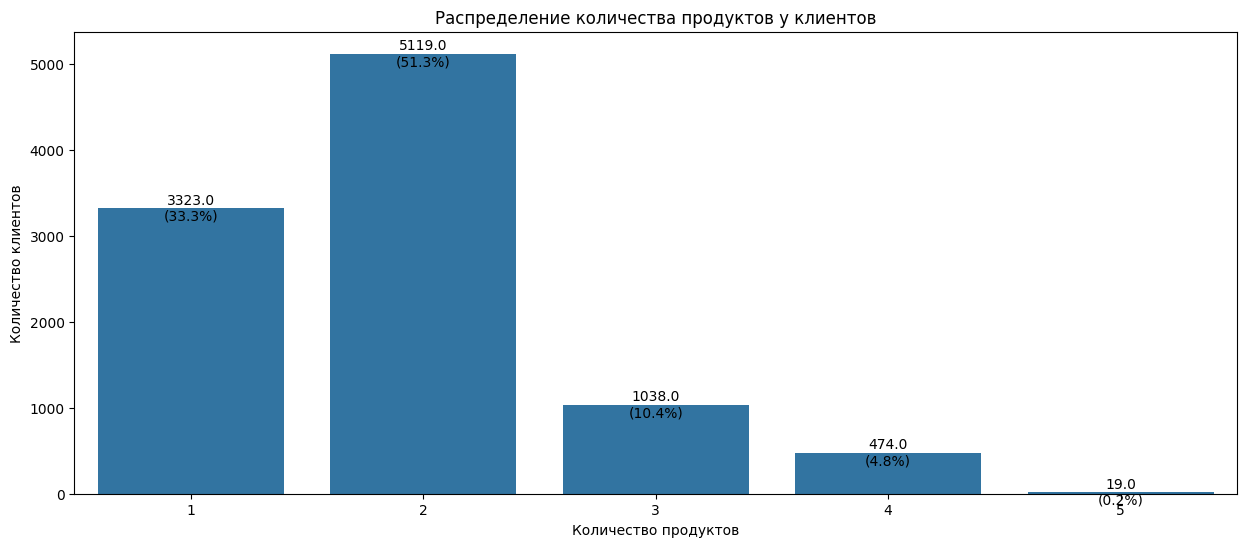

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='products', data=df)
plt.title('Распределение количества продуктов у клиентов')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
city_counts = df['products'].value_counts()
total_count = city_counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')
plt.show()

#### `credit_card`

In [ ]:
df['credit_card'].describe()

,credit_card
count,"9,973.00"
mean,0.68
std,0.47
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


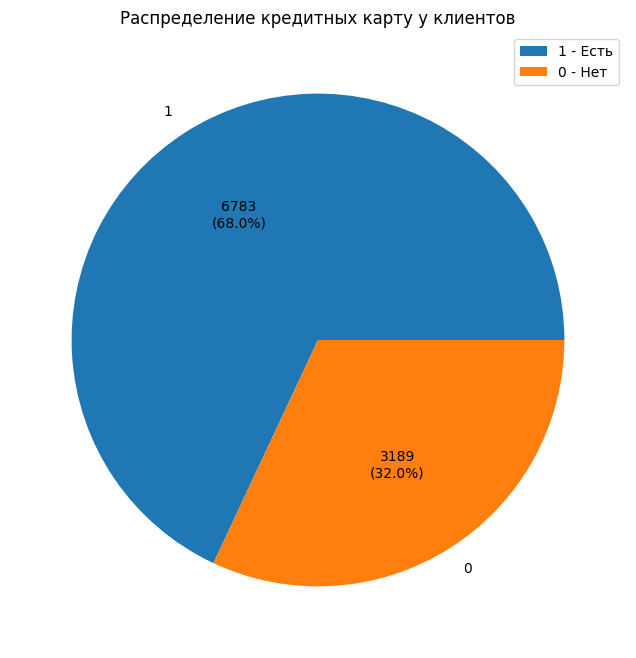

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

plt.figure(figsize=(8, 8))
values = df['credit_card'].value_counts()
plt.pie(values, labels=values.index, autopct=lambda pct: func(pct, values))
labels = ['1 - Есть', '0 - Нет']
plt.legend(labels, loc='best')
plt.title('Распределение кредитных карту у клиентов')
plt.ylabel('')
plt.show()

#### `last_activity`

In [ ]:
df['last_activity'].describe()

,last_activity
count,"9,973.00"
mean,0.52
std,0.50
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,1.00


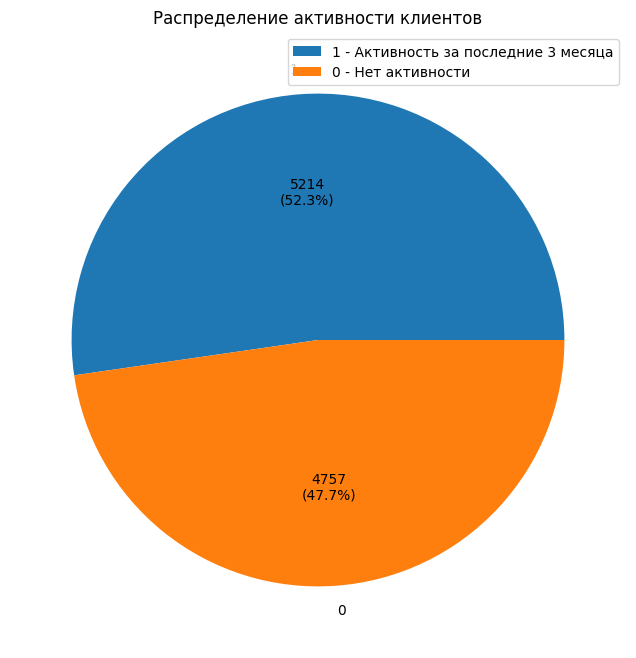

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

plt.figure(figsize=(8, 8))
values = df['last_activity'].value_counts()
plt.pie(values, labels=values.index, autopct=lambda pct: func(pct, values))
labels = ['1 - Активность за последние 3 месяца', '0 - Нет активности']
plt.legend(labels, loc='best')
plt.title('Распределение активности клиентов')
plt.ylabel('')
plt.show()

#### `est_salary`

In [ ]:
df['est_salary'].describe()

,est_salary
count,"9,973.00"
mean,"147,799.12"
std,"139,287.08"
min,"2,546.30"
25%,"75,252.02"
50%,"119,643.06"
75%,"174,499.96"
max,"1,395,064.45"


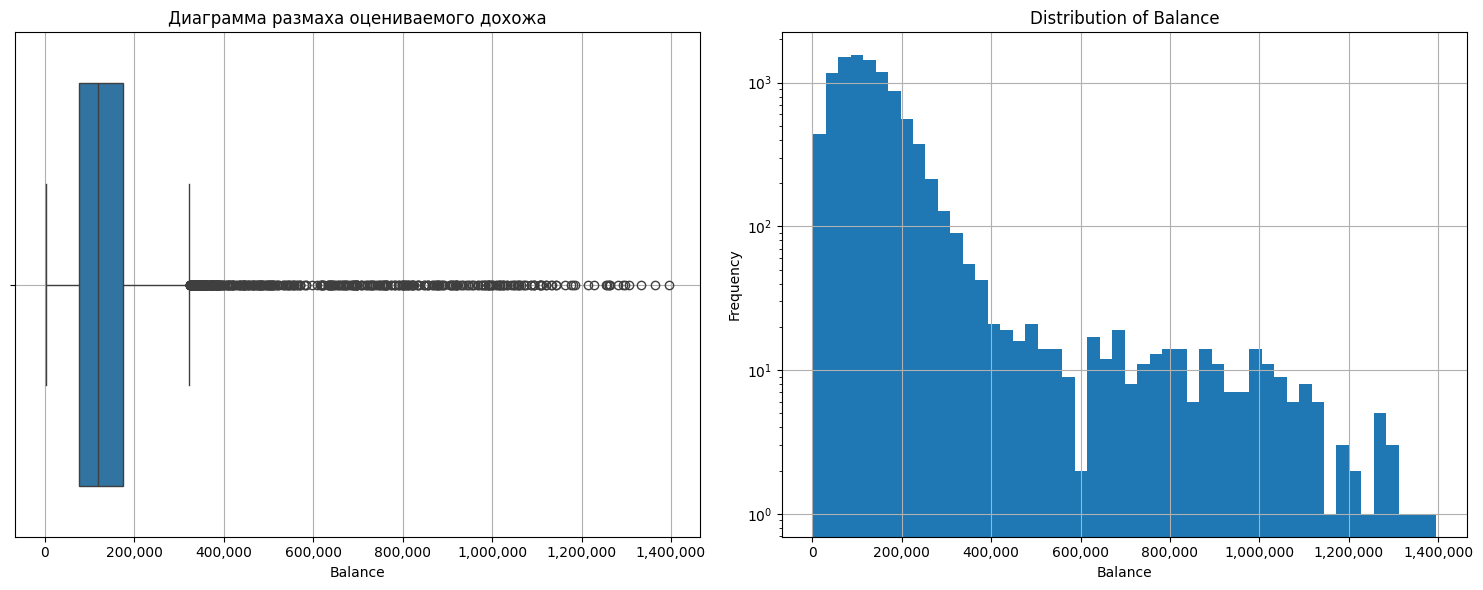

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df['est_salary'], ax=ax1)
ax1.set_title('Диаграмма размаха оцениваемого дохожа')
ax1.set_xlabel('Balance')
ax1.grid(True)
ax1.xaxis.set_major_formatter(FuncFormatter(formatter_func))

ax2.hist(df['est_salary'], bins=50, log=True)
ax2.set_title('Distribution of Balance')
ax2.set_xlabel('Balance')
ax2.set_ylabel('Frequency')
ax2.grid(True)
ax2.xaxis.set_major_formatter(FuncFormatter(formatter_func))

plt.tight_layout()
plt.show()

#### `churn`

In [ ]:
df['churn'].describe()

,churn
count,"9,973.00"
mean,0.18
std,0.39
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


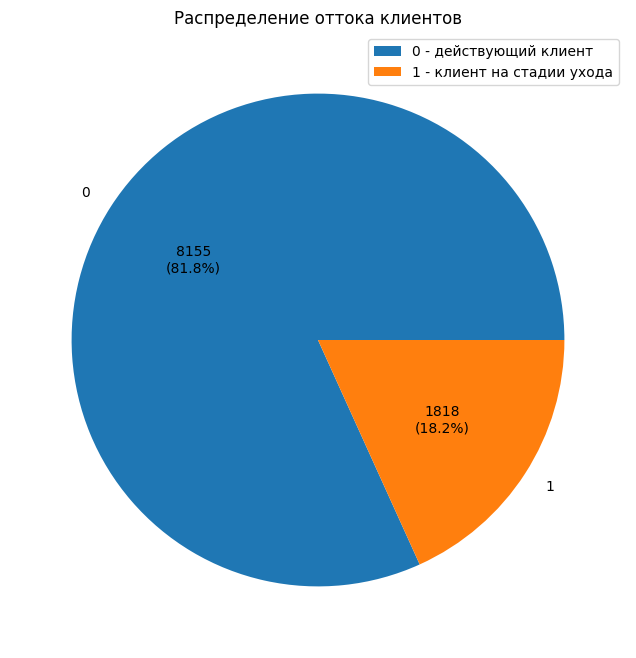

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}\n({pct:.1f}%)'

plt.figure(figsize=(8, 8))
values = df['churn'].value_counts()
plt.pie(values, labels=values.index, autopct=lambda pct: func(pct, values))
labels = ['0 - действующий клиент', '1 - клиент на стадии ухода']
plt.legend(labels, loc='best')
plt.title('Распределение оттока клиентов')
plt.ylabel('')
plt.show()

#### Вывод

- Кредитный рейтинг от  642 до 1000, в среднем 853
- Всего представлено 3 города: Ярославль - 5875 (58,9%), Рыбинск - 2682(26,9%), Ростов - 1416(14,2%)
- По полу клиенты распределены одинаково 50 на 50
- Возраст клиентов от 18 до 86, медианный - 40
- Оценка благосостояния от 0 до 9, медиана 3 балла
- Баланс от 0 до 119,113,552.01, медиана 524 000
- Всего у клиентов от 1 до 5 продуктов, медиана 2
- Кредитные карты есть у 68% клиентов
- 52,3% клиентов за последнее время были активны
- Оцениваемый доход от 2 546 до 1 395 064, медиана 119 643
- Отток среди 18,2% клиентов

### Сравнение портретов типичных клиентов

#### Расчёт среднего, медианы и моды

In [ ]:
means = df[['score', 'age', 'balance', 'equity', 'products', 'est_salary']].mean()
medians = df[['score', 'age', 'balance', 'equity', 'products', 'est_salary']].median()

discrete_means = df[['credit_card', 'last_activity', 'churn', 'gen_w', 'gen_m', 'city_rstv', 'city_rbnsk', 'city_yrsvl']].mean()
discrete_medians = df[['credit_card', 'last_activity', 'churn', 'gen_w', 'gen_m', 'city_rstv', 'city_rbnsk', 'city_yrsvl']].median()

summary_df = pd.DataFrame({
    'среднее (непрерывные)': means,
    'медиана (непрерывные)': medians,
    'среднее (дискретные)': discrete_means,
    'медиана (дискретные)': discrete_medians
})
summary_df = summary_df.fillna('')
summary_df

,среднее (непрерывные),медиана (непрерывные),среднее (дискретные),медиана (дискретные)
age,42.73,40.00,,
balance,"827,245.59","524,295.33",,
churn,,,0.18,0.00
city_rbnsk,,,0.27,0.00
city_rstv,,,0.14,0.00
city_yrsvl,,,0.59,1.00
credit_card,,,0.68,1.00
equity,2.63,3.00,,
est_salary,"147,799.12","119,643.06",,
gen_m,,,0.50,1.00


In [ ]:
display(df['city'].mode()[0])
display(df['gender'].mode()[0])

'Ярославль'

'М'

> Общий портрет клиента банка:
> - Медианный возраст - 40 лет.
> - Мужчин и женщин практически равно количество, но мужчин немного больше
> - Медианный баланс - 523,685.55 рублей
> - Средняя оценка благосостояния 2.63 балла
> - Медианный размер дохода 119,465.28 рублей
> - большинство клиентов имеет 2 продукта от банка
> - Средний рейтинг 848.51 баллов
> - 59% из Ярославля, 27% из Рыбинска, 14% из Ростова
> - 68% клиентов имеют кредитную карту
> - 52% клиентов были активны за последнее время
> -**18% на стадии оттока из банка**

#### Анализ разницы между категориями

##### По городам

In [ ]:
numeric_columns = ['score', 'age', 'balance', 'equity', 'products', 'est_salary', 'credit_card', 'last_activity', 'gen_w', 'gen_m', 'churn']

city_summary = df.groupby(['city']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'equity': ['median'],
    'products': ['median'],
    'est_salary': ['median'],
    'credit_card': ['mean'],
    'last_activity': ['mean'],
    'gen_w': ['mean'],
    'gen_m': ['mean'],
    'churn': ['mean']
}).reset_index()
city_summary = city_summary.style.background_gradient(cmap='GnBu').format("{:.2f}", subset=numeric_columns)
city_summary

,city,score,age,balance,equity,products,est_salary,credit_card,last_activity,gen_w,gen_m,churn
,,median,median,median,median,median,median,mean,mean,mean,mean,mean
0,Ростов,841.00,42.00,485619.82,3.00,2.00,100059.38,0.57,0.53,0.52,0.48,0.19
1,Рыбинск,853.00,41.00,503477.93,3.00,2.00,113335.90,0.64,0.56,0.51,0.49,0.16
2,Ярославль,855.00,39.00,544525.02,3.00,2.00,127919.68,0.72,0.50,0.49,0.51,0.19


> - Наилучший медианный кредитный рейтинг в Ярославле — 855 баллов, самый низкий в Ростове — 841 балл.
> - В Ярославле из всех городов самый низкий медианный возраст — 39 лет, в Ростове — самый высокий — 42 года.
> - Медианный баланс у жителей Ярославля самый высокий — 544525.02 руб., в Ростове — самый низкий — 0	485619.82.
> - Значение медианы оценки благосостояния одинаково во всех городах — 3.
> - Значение медианы количества продуктов одинаково во всех городах — 2.
> - Средняя заработная плата в Ярославле из всех городов самая высокая — 127,822.99, в Ростове — самая низкая — 100,059.38.
> - Самая высокий % использования кредитных карт в Ярославле — 72%, в Ростове — самая низкая 57%.
> - Самая высокий % активности в Рыбинск — 56%, в Ярославле — 50%.
> - Доля мужчин и женщин в целом сбалансирована, но в Ярославле немного больше мужчин — 51%, в Ростове — меньше — 48%.
> - **Наименьший уровень оттока в Рыбинске — 16%, в Ростове и Ярославле уровень одинаковый — 19%**.

##### По полу

In [ ]:
gender_summary = df.groupby(['gender']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'equity': ['median'],
    'products': ['median'],
    'est_salary': ['median'],
    'credit_card': ['mean'],
    'last_activity': ['mean'],
    'city_rstv': ['mean'],
    'city_rbnsk': ['mean'],
    'city_yrsvl': ['mean'],
    'churn': ['mean']
}).reset_index()
gender_summary = gender_summary.style.background_gradient(cmap='GnBu')
gender_summary

,gender,score,age,balance,equity,products,est_salary,credit_card,last_activity,city_rstv,city_rbnsk,city_yrsvl,churn
,,median,median,median,median,median,median,mean,mean,mean,mean,mean,mean
0,Ж,851.000000,43.000000,511315.680000,3.000000,2.000000,111478.775000,0.621437,0.529506,0.147130,0.275592,0.577278,0.127459
1,М,855.000000,38.000000,539423.530000,3.000000,2.000000,129311.000000,0.738930,0.516329,0.136846,0.262272,0.600882,0.237027


> - Наилучший медианный кредитный рейтинг у мужчин — 855 баллов, у женщин — 851 баллов.
> - У мужчин медианный возраст самый низкий — 38 лет, у женщин — самый высокий — 43 года.
> - Медианный баланс у мужчин самый высокий — 538,592.00, у женщин — 510,595.33.
> - Значение медианы оценки благосостояния и количества продуктов одинаково для обоих полов — 3 и 2 соответственно.
> - Медианная заработная плата у мужчин самая высокая — 129,204.04, у женщин — 111,514.43.
> - Самая высокая средняя доля использования кредитных карт у мужчин — 0.74, у женщин — 0.62.
> - Самая высокая средняя доля активности у женщин — 0.53, у мужчин — 0.51.
> - Доля жителей городов Ростов, Рыбинск и Ярославль у мужчин и женщин различается, но тенденции в распределении по городам схожи, с увеличением доли в Ярославле и уменьшением в Ростове и Рыбинске.
> - **Наименьший уровень оттока женщин — 0.13, у мужчин — 0.233.**

##### По полу и городу

In [ ]:
city_gender_summary = df.groupby(['city', 'gender']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'equity': ['median'],
    'products': ['median'],
    'est_salary': ['median'],
    'credit_card': ['mean'],
    'last_activity': ['mean'],
    'churn': ['mean']
}).reset_index()
city_gender_summary = city_gender_summary.style.background_gradient(cmap='GnBu')
city_gender_summary

,city,gender,score,age,balance,equity,products,est_salary,credit_card,last_activity,churn
,,,median,median,median,median,median,median,mean,mean,mean
0,Ростов,Ж,841.000000,45.000000,477533.260000,3.000000,2.000000,92855.810000,0.508868,0.545703,0.122783
1,Ростов,М,842.000000,39.000000,504074.190000,3.000000,2.000000,106887.860000,0.631040,0.516837,0.256223
2,Рыбинск,Ж,853.000000,44.000000,481944.440000,3.000000,2.000000,104478.430000,0.600874,0.565186,0.100510
3,Рыбинск,М,853.000000,39.000000,519364.810000,3.000000,2.000000,123713.840000,0.684492,0.560733,0.227655
4,Ярославль,Ж,853.000000,42.000000,529342.355000,3.000000,2.000000,119255.250000,0.659944,0.508345,0.141516
5,Ярославль,М,859.000000,38.000000,563923.730000,3.000000,2.000000,138455.810000,0.787262,0.496832,0.236746


> - Наилучший медианный кредитный рейтинг наблюдается у мужчин из Ярославля — 859 баллов, самый низкий — у женщин из Ростова — 841 балл.
> - Самый низкий медианный возраст у мужчин из Ярославля — 38 лет, самый высокий — у женщин из Ростова — 45 лет.
> - Самый высокий медианный баланс у мужчин из Ярославля — 563,030.74, самый низкий — у женщин из Ростова — 477,533.26.
> - Значение медианы equity и products одинаково для всех групп — 3 и 2 соответственно.
> - Средняя заработная плата самая высокая у мужчин из Ярославля — 138,167.69, самая низкая — у женщин из Ростова — 92,855.81.
> - Самая высокая средняя доля использования кредитных карт у мужчин из Ярославля — 0.789, самая низкая — у женщин из Ростова — 0.509.
> - Самая высокая средняя доля активности у женщин из Рыбинска — 0.565, самая низкая — у мужчин из Ярославля — 0.496.
> - **Наименьший уровень оттока (churn) у женщин из Рыбинска — 0.096, самый высокий — у мужчин из Ростова — 0.256.**

##### По оценке благосостояния

In [ ]:
equity_summary = df.groupby(['equity']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'products': ['median'],
    'est_salary': ['median'],
    'credit_card': ['mean'],
    'last_activity': ['mean'],
    'gen_w': ['mean'],
    'gen_m': ['mean'],
    'city_rstv': ['mean'],
    'city_rbnsk': ['mean'],
    'city_yrsvl': ['mean'],
    'churn': ['mean']
}).reset_index()
equity_summary = equity_summary.style.background_gradient(cmap='GnBu').format("{:.2f}")
equity_summary

,equity,score,age,balance,products,est_salary,credit_card,last_activity,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl,churn
,,median,median,median,median,median,mean,mean,mean,mean,mean,mean,mean,mean
0,0.00,896.00,40.00,133780.07,1.00,161021.27,0.80,0.54,0.46,0.54,0.11,0.26,0.63,0.03
1,1.00,818.00,40.00,215786.27,2.00,103826.39,0.74,0.51,0.51,0.49,0.16,0.29,0.55,0.12
2,2.00,820.00,41.00,321998.46,2.00,102335.38,0.69,0.47,0.52,0.48,0.16,0.27,0.57,0.16
3,3.00,830.00,41.00,463796.54,2.00,102431.58,0.64,0.51,0.54,0.46,0.16,0.27,0.57,0.21
4,4.00,850.00,40.00,636819.98,2.00,110929.60,0.63,0.52,0.52,0.48,0.15,0.28,0.57,0.25
5,5.00,868.00,40.00,853301.25,2.00,115740.11,0.59,0.53,0.49,0.51,0.14,0.26,0.59,0.30
6,6.00,863.00,40.00,630045.54,2.00,107373.56,0.60,0.57,0.43,0.57,0.17,0.22,0.61,0.36
7,7.00,863.50,38.00,609306.78,2.00,91802.02,0.60,0.62,0.46,0.54,0.15,0.24,0.61,0.46
8,8.00,894.00,43.00,709251.46,2.00,109984.16,0.35,0.65,0.47,0.53,0.18,0.24,0.59,0.35


> - Наивысший медианный кредитный рейтинг наблюдается у группы с `equity` 0 — 896 балла, самый низкий — у группы с `equity` 1 — 818 баллов.
> - Самый низкий медианный возраст в группе с `equity` 9 — 36 лет, самый высокий — в группе с `equity` 2 и 3 — 41 год.
> - Самый высокий медианный баланс у группы с `equity` 5 — 853594.33, самый низкий — у группы с `equity` 0 — 133780.07.
> - Медианное количество продуктов одинаково для групп с `equity` от 1 до 8 — 2 продукта.
> - Самая высокая медианная заработная плата в группе с `equity` 0 — 161021.27, самая низкая — в группе с `equity` 7 — 91802.02.
> - Самый высокий медианный показатель использования кредитных карт у группы с `equity` 0 — 0.80, самый низкий — у группы с `equity` 8 — 0.35.
> - Самая высокая медианная доля активности наблюдается у группы с `equity` 8 — 0.65, самая низкая — у группы с `equity` 9 — 0.46.
> - Самый высокий медианный уровень `gen_w` наблюдается у группы с `equity` 3 — 0.54, самый низкий — у группы с `equity` 6 — 0.43.
> - Самый высокий медианный уровень `gen_m` наблюдается у группы с `equity` 6 — 0.57, самый низкий — у группы с `equity` 3 — 0.46.
> - **Наименьший медианный уровень оттока (churn) у группы с `equity` 0 — 0.03, самый высокий — у группы с `equity` 9 — 0.54.**

##### По количеству продуктов

In [ ]:
products_summary = df.groupby(['products']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'equity': ['median'],
    'est_salary': ['median'],
    'credit_card': ['mean'],
    'last_activity': ['mean'],
    'gen_w': ['mean'],
    'gen_m': ['mean'],
    'city_rstv': ['mean'],
    'city_rbnsk': ['mean'],
    'city_yrsvl': ['mean'],
    'churn': ['mean']
}).reset_index()
products_summary = products_summary.style.background_gradient(cmap='GnBu').format("{:.2f}")
products_summary

,products,score,age,balance,equity,est_salary,credit_card,last_activity,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl,churn
,,median,median,median,median,median,mean,mean,mean,mean,mean,mean,mean,mean
0,1.00,883.00,40.00,415369.49,0.00,142163.00,0.86,0.53,0.46,0.54,0.13,0.26,0.61,0.07
1,2.00,844.00,40.00,515461.00,3.00,109508.21,0.63,0.52,0.52,0.48,0.16,0.30,0.54,0.19
2,3.00,828.00,42.00,665382.31,4.00,105655.98,0.36,0.42,0.57,0.43,0.09,0.16,0.75,0.29
3,4.00,874.00,38.00,939342.90,4.00,122472.51,0.68,0.79,0.38,0.62,0.14,0.21,0.65,0.63
4,5.00,851.00,37.00,282262.33,4.00,106033.79,1.00,0.89,0.47,0.53,0.21,0.05,0.74,0.42


> - Наивысший медианный кредитный рейтинг наблюдается у группы с количеством продуктов 1 — 883.5 баллов, самый низкий — у группы с количеством продуктов 3 — 828 баллов.
> - Самый низкий медианный возраст в группе с количеством продуктов 5 — 37 лет, самый высокий — в группе с количеством продуктов 3 — 42 года.
> - Самый высокий медианный баланс у группы с количеством продуктов 4 — 939342.90, самый низкий — у группы с количеством продуктов 5 — 282262.33.
> - Группа с количеством продуктов 3,4,5 имеет самый высокий медианный `equity` — 4, а группа с количеством продуктов 1 имеет самый низкий `equity` — 0.
> - Самая высокая медианная заработная плата у группы с количеством продуктов 1 — 142163.00, самая низкая — у группы с количеством продуктов 3 — 105655.98.
> - Самый высокий медианный показатель использования кредитных карт у группы с количеством продуктов 5 — 1.00, самый низкий — у группы с количеством продуктов 3 — 0.36.
> - Самая высокая медианная доля активности наблюдается у группы с количеством продуктов 5 — 0.89, самая низкая — у группы с количеством продуктов 3 — 0.42.
> - Самый высокий медианный уровень женщин среди группы с количеством продуктов 3 — 0.57, самый низкий — у группы с количеством продуктов 4 — 0.38.
> - Самый высокий медианный уровень мужчин у группы с количеством продуктов 4 — 0.62, самый низкий — у группы с количеством продуктов 3 — 0.43.
> - **Наименьший медианный уровень оттока (churn) у группы с количеством продуктов 1 — 0.07, самый высокий — у группы с количеством продуктов 4 — 0.39.**

##### По наличию кредитной карты

In [ ]:
credit_card_summary = df.groupby(['credit_card']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'products': ['median'],
    'equity': ['median'],
    'est_salary': ['median'],
    'last_activity': ['mean'],
    'gen_w': ['mean'],
    'gen_m': ['mean'],
    'city_rstv': ['mean'],
    'city_rbnsk': ['mean'],
    'city_yrsvl': ['mean'],
    'churn': ['mean']
}).reset_index()
credit_card_summary = credit_card_summary.style.background_gradient(cmap='GnBu').format("{:.2f}")
credit_card_summary

,credit_card,score,age,balance,products,equity,est_salary,last_activity,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl,churn
,,median,median,median,median,median,median,mean,mean,mean,mean,mean,mean,mean
0,0.00,860.00,43.00,636740.80,2.00,3.00,116488.92,0.55,0.59,0.41,0.19,0.30,0.51,0.26
1,1.00,848.00,39.00,469457.29,2.00,3.00,120889.49,0.51,0.46,0.54,0.12,0.25,0.63,0.15


> - Наивысший медианный кредитный рейтинг наблюдается у группы без карты (`credit_card` 0) — 860 баллов, самый низкий — у группы с картой (`credit_card` 1) — 848 баллов.
> - Самый низкий медианный возраст в группе с картой (`credit_card` 1) — 39 лет, самый высокий — в группе без карты (`credit_card` 0) — 43 года.
> - Самый высокий медианный баланс у группы без карты (`credit_card` 0) — 	636740.80, самый низкий — у группы с картой (`credit_card` 1) — 469457.29.
> - Медианное количество продуктов одинаково для обеих групп — 2 продукта.
> - Медианное значение `equity` также одинаково для обеих групп — 3.
> - Самая высокая медианная заработная плата у группы с картой (`credit_card` 1) — 120889.49, самая низкая — у группы без карты (`credit_card` 0) — 116488.92.
> - Самый высокий медианный показатель активности у группы без карты (`credit_card` 0) — 0.55, самый низкий — у группы с картой (`credit_card` 1) — 0.51.
> - Самый высокий медианный уровень женщин у группы с картой (`credit_card` 1) — 0.59, самый низкий — у группы без карты (`credit_card` 0) — 0.41.
> - Самый высокий медианный уровень мужчин у группы без карты (`credit_card` 0) — 0.59, самый низкий — у группы с картой (`credit_card` 1) — 0.46.
> - **Наименьший медианный уровень оттока (churn) у группы с картой (`credit_card` 1) — 0.15, самый высокий — у группы без карты (`credit_card` 0) — 0.26.**

##### По активности

In [ ]:
last_activity_summary = df.groupby(['last_activity']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'products': ['median'],
    'equity': ['median'],
    'est_salary': ['median'],
    'credit_card': ['mean'],
    'gen_w': ['mean'],
    'gen_m': ['mean'],
    'city_rstv': ['mean'],
    'city_rbnsk': ['mean'],
    'city_yrsvl': ['mean'],
    'churn': ['mean']
}).reset_index()
last_activity_summary = last_activity_summary.style.background_gradient(cmap='GnBu').format("{:.2f}")
last_activity_summary

,last_activity,score,age,balance,products,equity,est_salary,credit_card,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl,churn
,,median,median,median,median,median,median,mean,mean,mean,mean,mean,mean,mean
0,0.00,855.00,41.00,512485.07,2.00,3.00,120348.61,0.70,0.49,0.51,0.14,0.25,0.61,0.11
1,1.00,850.00,40.00,535431.94,2.00,3.00,118733.03,0.67,0.51,0.49,0.14,0.29,0.57,0.24


> - Наивысший медианный кредитный рейтинг наблюдается у группы с низким уровнем активности (`last_activity` 0) — 855 баллов, самый низкий — у группы с высоким уровнем активности (`last_activity` 1) — 850 баллов.
> - Самый низкий медианный возраст у группы с высоким уровнем активности (`last_activity` 1) — 40 лет, самый высокий — у группы с низким уровнем активности (`last_activity` 0) — 41 год.
> - Самый высокий медианный баланс у группы с высоким уровнем активности (`last_activity` 1) — 535431.94, самый низкий — у группы с низким уровнем активности (`last_activity` 0) — 512485.07.
> - Медианное количество продуктов одинаково для обеих групп — 2 продукта.
> - Медианное значение `equity` одинаково для обеих групп — 3.
> - Самая высокая медианная заработная плата у группы с низким уровнем активности (`last_activity` 0) — 120348.61, самая низкая — у группы с высоким уровнем активности (`last_activity` 1) — 118733.03.
> - Самый высокий медианный показатель активности у группы с низким уровнем активности (`last_activity` 0) — 0.70, самый низкий — у группы с высоким уровнем активности (`last_activity` 1) — 0.67.
> - Самый высокий медианный уровень женщин у группы с высоким уровнем активности (`last_activity` 1) — 0,51, самый низкий — у группы с низким уровнем активности (`last_activity` 0) — 0.49.
> - Самый высокий медианный уровень мужчин у группы с низким уровнем активности (`last_activity` 0) — 0.51, самый низкий — у группы с высоким уровнем активности (`last_activity` 1) — 0.49.
> - **Наименьший медианный уровень оттока (churn) у группы с низким уровнем активности (`last_activity` 0) — 0.11, самый высокий — у группы с высоким уровнем активности (`last_activity` 1) — 0.24.**

##### По уходу из банка

In [ ]:
churn_summary = df.groupby(['churn']).agg({
    'score': ['median'],
    'age': ['median'],
    'balance': ['median'],
    'products': ['median'],
    'equity': ['median'],
    'est_salary': ['median'],
    'last_activity': ['mean'],
    'credit_card': ['mean'],
    'last_activity': ['mean'],
    'gen_w': ['mean'],
    'gen_m': ['mean'],
    'city_rstv': ['mean'],
    'city_rbnsk': ['mean'],
    'city_yrsvl': ['mean']
}).reset_index()
churn_summary = churn_summary.style.background_gradient(cmap='GnBu').format("{:.2f}")
churn_summary

,churn,score,age,balance,products,equity,est_salary,last_activity,credit_card,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl
,,median,median,median,median,median,median,mean,mean,mean,mean,mean,mean,mean
0,0.00,848.00,40.00,475410.09,2.00,3.00,118227.60,0.48,0.71,0.53,0.47,0.14,0.28,0.58
1,1.00,866.00,39.00,783908.90,2.00,4.00,125408.88,0.70,0.55,0.35,0.65,0.15,0.24,0.61


> - Наивысший медианный кредитный рейтинг наблюдается у группы с высоким уровнем оттока (`churn` 1) — 866 баллов, самый низкий — у группы с низким уровнем оттока (`churn` 0) — 848 баллов.
> - Самый низкий медианный возраст у группы с высоким уровнем оттока (`churn` 1) — 39 лет, самый высокий — у группы с низким уровнем оттока (`churn` 0) — 40 лет.
> - Самый высокий медианный баланс у группы с высоким уровнем оттока (`churn` 1) — 783908.90, самый низкий — у группы с низким уровнем оттока (`churn` 0) — 475410.09.
> - Медианное количество продуктов одинаково для обеих групп — 2 продукта.
> - Самое высокое медианное значение `equity` у группы с высоким уровнем оттока (`churn` 1) — 4, а у группы с низким уровнем оттока (`churn` 0) — 3.
> - Самая высокая медианная заработная плата у группы с высоким уровнем оттока (`churn` 1) — 125408.88, самая низкая — у группы с низким уровнем оттока (`churn` 0) — 118227.60.
> - Самый высокий медианный показатель активности у группы с высоким уровнем оттока (`churn` 1) — 0.70, самый низкий — у группы с низким уровнем оттока (`churn` 0) — 0.48.
> - Самый высокий медианный уровень женщин у группы с низким уровнем оттока (`churn` 0) — 0.71, самый низкий — у группы с высоким уровнем оттока (`churn` 1) — 0.55.
> - Самый высокий медианный уровень мужчин у группы с высоким уровнем оттока (`churn` 1) — 0.65, самый низкий — у группы с низким уровнем оттока (`churn` 0) — 0.47.

### Визуализация данных в разрезе отттока

#### Непрерывные категории

##### `score`

In [ ]:
fig = px.histogram(df, x='score', color='churn', histnorm='probability density',
                   barmode='overlay', nbins=50, opacity=0.5,
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.for_each_trace(lambda t: t.update(name='Не отточные' if t.name == '0' else 'Отточные'))
fig.update_layout(
    title='Распределение кредитного рейтинга клиентов в разрезе оттока',
    xaxis_title='Кредитный рейтинг',
    yaxis_title='Плотность вероятности',
    width=1000, height=600
)
fig.show()

> **Отточная категория среди клиентов с кредитным рейтингом от 820 до 940 баллов**

##### `age`

In [ ]:
fig = px.histogram(df, x='age', color='churn', histnorm='probability density',
                   barmode='overlay', nbins=70, opacity=0.5,
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.for_each_trace(lambda t: t.update(name='Не отточные' if t.name == '0' else 'Отточные'))
fig.update_layout(
    title='Распределение возраста клиентов в разрезе оттока',
    xaxis_title='Возраст',
    yaxis_title='Плотность вероятности',
    width=980, height=600
)
fig.show()

> **Отточные категории среди клиентов в возрасте 25-35 и 50-60 лет**

##### `balance`

In [ ]:
low_balance_data = df[df['balance'] <= 5000000]

fig = px.histogram(low_balance_data, x='balance', color='churn', histnorm='probability density',
                   barmode='overlay', nbins=50, opacity=0.5,
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.for_each_trace(lambda t: t.update(name='Не отточные' if t.name == '0' else 'Отточные'))
fig.update_layout(
    title='Распределение баланса клиентов (до 5 млн.) в разрезе оттока',
    xaxis_title='Баланс',
    yaxis_title='Плотность вероятности',
    width=980, height=600
)
fig.show()

> **Отточные категории среди клиентов с балансом от 750 000 до 5 000 000**

In [ ]:
high_balance_data = df[df['balance'] > 5000000]

fig = px.histogram(high_balance_data, x='balance', color='churn', histnorm='probability density',
                   barmode='overlay', nbins=20, opacity=0.5,
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.for_each_trace(lambda t: t.update(name='Не отточные' if t.name == '0' else 'Отточные'))
fig.update_layout(
    title='Распределение баланса клиентов (от 5 млн.) в разрезе оттока',
    xaxis_title='Баланс',
    yaxis_title='Плотность вероятности',
    width=980, height=600
)
fig.show()

> **Среди клиентов с балансом от 5 000 000 отточные категории с балансом от 10 до 20 млн и от 60 до 70 млн**

##### `est_salary`

In [ ]:
fig = px.histogram(df, x='est_salary', color='churn', histnorm='probability density',
                   barmode='overlay', nbins=100, opacity=0.5,
                   color_discrete_map={0: 'blue', 1: 'red'})
fig.for_each_trace(lambda t: t.update(name='Не отточные' if t.name == '0' else 'Отточные'))
fig.update_layout(
    title='Распределение дохода клиентов в разрезе оттока',
    xaxis_title='Доход',
    yaxis_title='Плотность вероятности',
    width=980, height=600
)
fig.show()

> **Отточные категории среди клиентов с доходом от 100 000 от 220 000**

<div class="alert alert-success">
<h2> Комментарий тимлида 😊<a class="tocSkip"> </h2>

Отлично справился с нормированными гистограммами и выводами по ним)

#### Категориальные переменнные

##### `city`

In [ ]:
city_churn = df.pivot_table(values='churn', index='city', aggfunc='mean').reset_index()
avg_churn = df['churn'].mean()
fig = px.bar(city_churn, x='churn', y='city', title='Средний уровень оттока по городам',
             labels={'churn': 'Уровень оттока', 'city': 'Город'}, orientation='h')
fig.add_vline(x=avg_churn, line_dash="dash", line_color="red", annotation_text="Средний отток по банку",
              annotation_position="bottom right")
fig.show()

> **Превышение среднего оттока наблюдается в Ярославле и Ростове до 18,7%**

##### `gender`

In [ ]:
gender_churn = df.pivot_table(values='churn', index='gender', aggfunc='mean').reset_index()
avg_churn = df['churn'].mean()
fig = px.bar(gender_churn, x='churn', y='gender', title='Средний уровень оттока по полу',
             labels={'churn': 'Уровень оттока', 'gender': 'Пол'}, orientation='h')
fig.add_vline(x=avg_churn, line_dash="dash", line_color="red", annotation_text="Средний отток по банку",
              annotation_position="bottom right")
fig.show()

> **Превышение среднего оттока наблюдается среди мужчин до 23,4%**

##### `equity`

In [ ]:
equity_churn = df.pivot_table(values='churn', index='equity', aggfunc='mean').reset_index()
avg_churn = df['churn'].mean()
fig = px.bar(equity_churn, x='churn', y='equity', title='Средний уровень оттока по оценке благосостояния',
             labels={'churn': 'Уровень оттока', 'equity': 'Оценка благосостояния'}, orientation='h')
fig.add_vline(x=avg_churn, line_dash="dash", line_color="red", annotation_text="Средний отток по банку",
              annotation_position="bottom right")
fig.show()

> **Превышение среднего оттока наблюдается среди клиентов с оценкой благосостояния от 3 (20%) вплоть до 53% среди клиентов с оценкой в 9 баллов**

##### `products`

In [ ]:
products_churn = df.pivot_table(values='churn', index='products', aggfunc='mean').reset_index()
avg_churn = df['churn'].mean()
fig = px.bar(products_churn, x='churn', y='products', title='Средний уровень оттока по количеству продуктов',
             labels={'churn': 'Уровень оттока', 'products': 'Количество продуктов'}, orientation='h')
fig.add_vline(x=avg_churn, line_dash="dash", line_color="red", annotation_text="Средний отток по банку",
              annotation_position="bottom right")
fig.show()

> **Превышение среднего оттока наблюдается среди клиентов с количеством продуктов от 2 (18,8%) вплоть до 62,8% среди клиентов с 4 продуктами**

##### `credit_card`

In [ ]:
credit_card_churn = df.pivot_table(values='churn', index='credit_card', aggfunc='mean').reset_index()
credit_card_churn['credit_card'] = credit_card_churn['credit_card'].replace({0: 'Нет кредитной карты', 1: 'Есть кредитная карта'})
avg_churn = df['churn'].mean()
fig = px.bar(credit_card_churn, x='churn', y='credit_card', title='Средний уровень оттока по наличию кредитной карты',
             labels={'churn': 'Уровень оттока', 'credit_card': 'Наличие кредитной карты'}, orientation='h')
fig.add_vline(x=avg_churn, line_dash="dash", line_color="red", annotation_text="Средний отток по банку",
              annotation_position="bottom right")
fig.show()

> **Среди клиентов у которых нет кредитной карты наблюдается превышение среднего оттока до 25,17%**

##### `last_activity`

In [ ]:
last_activity_churn = df.pivot_table(values='churn', index='last_activity', aggfunc='mean').reset_index()
last_activity_churn['last_activity'] = last_activity_churn['last_activity'].replace({0: 'Неактивные', 1: 'Аактивные'})
avg_churn = df['churn'].mean()
fig = px.bar(last_activity_churn, x='churn', y='last_activity', title='Средний уровень оттока по активности',
             labels={'churn': 'Уровень оттока', 'last_activity': 'Активность'}, orientation='h')
fig.add_vline(x=avg_churn, line_dash="dash", line_color="red", annotation_text="Средний отток по банку",
              annotation_position="bottom right")
fig.show()

> **Превышение среднего оттока до 24,4% наблюдается среди активных за последнее время клиентов**

<div class="alert alert-success">
<h2> Комментарий тимлида 😊<a class="tocSkip"> </h2>

Категориальные данные проанализированы верно, молодец!)

### Оценка корреляции

####  Корреляция Пирсона

In [ ]:
df

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gen_w,gen_m,city_rstv,city_rbnsk,city_yrsvl,gender,city
0,183012,850.00,25.00,1,"59,214.82",2,0,1,"75,719.14",1,True,False,False,True,False,Ж,Рыбинск
1,146556,861.00,37.00,5,"850,594.33",3,1,0,"86,621.77",0,True,False,False,True,False,Ж,Рыбинск
2,120722,892.00,30.00,0,NaN,1,1,1,"107,683.34",0,True,False,False,True,False,Ж,Рыбинск
3,225363,866.00,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,True,False,False,False,True,Ж,Ярославль
4,157978,730.00,34.00,5,174.00,1,1,0,"67,353.16",1,False,True,False,False,True,М,Ярославль
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,27.00,1,"78,144.65",1,0,1,"18,943.64",0,False,True,False,True,False,М,Рыбинск
9996,139170,894.00,46.00,0,NaN,1,1,0,"196,898.29",0,False,True,False,False,True,М,Ярославль
9997,115639,903.00,24.00,0,NaN,2,1,1,"108,905.09",0,False,True,False,False,True,М,Ярославль
9998,148700,777.00,68.00,3,"865,457.97",3,0,1,"86,874.90",0,True,False,False,False,True,Ж,Ярославль


In [ ]:
#corr_matrix = df.drop(columns='user_id').corr().round(2)
corr_matrix = df.select_dtypes(include=[float, int]).drop(columns='user_id', errors='ignore').corr().round(2)
fig = px.imshow(corr_matrix,
                color_continuous_scale='RdBu_r',
                title='Тепловая карта корреляции признаков',
                text_auto=True,
               width=990, height=1000)
fig.show()

In [ ]:
churn_corr = corr_matrix[['churn']].sort_values(by='churn', ascending=False).round(2)
fig = px.imshow(churn_corr,
                color_continuous_scale='RdBu_r',
                title='Корреляция признаков с оттоком (churn)',
                text_auto=True,
                zmin=-1, zmax=1,
               width=400, height=800)
fig.show()

> Сфокусируемся на корреляциях признаков с churn:
> - `score`: Корреляция -0.01, что указывает на слабую отрицательную связь. Влияние на отток клиентов минимально.
> - `age`: Корреляция -0.05, также слабая отрицательная связь.
> - `equity`: Корреляция 0.27, умеренная положительная связь. Это может указывать на то, что клиенты с более высоким уровнем капитала склонны к более высокому уровню оттока.
> - `balance`: Корреляция 0.08, слабая положительная связь.
> - `products`: Корреляция 0.30, умеренная положительная связь. Клиенты, имеющие больше продуктов, могут быть склонны к большему оттоку.
> - `credit_card`: Корреляция -0.13, слабая отрицательная связь. Наличие кредитной карты может немного уменьшать отток.
> - `last_activity`: Корреляция 0.17, умеренная положительная связь. Более активные клиенты имеют тенденцию к большему оттоку.
> - `est_salary`: Корреляция -0.00, практически отсутствует.
> - `gen_w` и `gen_m`: Корреляция с churn незначительная, так как пол имеет слабую связь с оттоком.
> - `city_rstv`, `city_rbnsk`, `city_yrsvl`: Корреляция с churn варьируется от -0.49 до 1.00, что указывает на разную степень связи с оттоком в зависимости от города. Например, в городе city_rbnsk наблюдается сильная отрицательная связь.
>
>Признаки `products` и `equity` показывают наиболее выраженные связи с оттоком.
>
>Переменные вроде `credit_card` и `balance` имеют слабую корреляцию с оттоком и могут требовать дополнительного анализа для выявления скрытых паттернов.
>
>Корреляция с переменными города указывает на то, что отток может сильно различаться в зависимости от географического положения.

#### Корреляция Фика

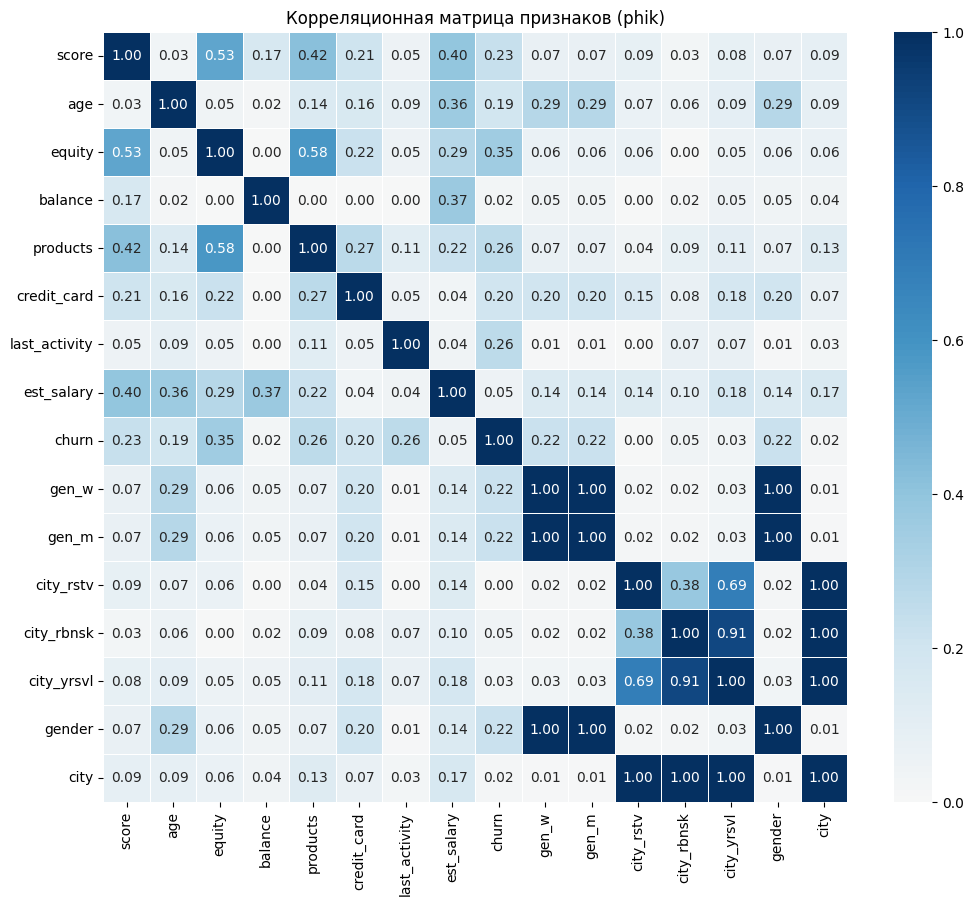

In [ ]:
interval_cols = ['user_id','score','age', 'balance', 'est_salary']
phik_corr_matrix = df.drop(columns='user_id').phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr_matrix, annot=True, cmap='RdBu', center=0, fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица признаков (phik)')
plt.show()

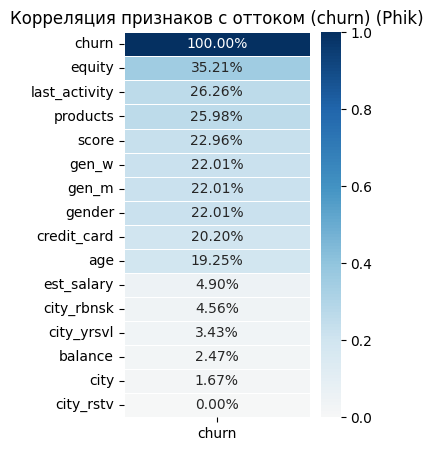

In [ ]:
churn_phik_corr = phik_corr_matrix[['churn']].sort_values(by='churn', ascending=False)
plt.figure(figsize=(3, 5))
sns.heatmap(churn_phik_corr, annot=True, cmap='RdBu', center=0, fmt='.2%', linewidths=0.5)
plt.title('Корреляция признаков с оттоком (churn) (Phik)')
plt.show()

> 1. Сильные корреляции с признаками
> - `equity` и `products`: Обе переменные демонстрируют сильную корреляцию с другими признаками, что указывает на их важную роль в анализируемых данных:
>  - Корреляция `equity` с `score` (0.53) и с `products` (0.58) является одной из самых высоких. Это говорит о том, что уровень благостостояния тесно связан как с кредитным рейтингом клиента, так и с количеством продуктов, которые он использует.
>  - Корреляция `products` с `churn` (0.26): Количество продуктов, которые у клиента есть, оказывает значительное влияние на вероятность его ухода.
> - `score` и `equity`:`
>  - Корреляция между `score` и `equity` (0.53) может указывать на то, что более состоятельные клиенты (с высокой долей в капитале) имеют более высокий кредитный рейтинг. Эта взаимосвязь важна для оценки рисков, так как кредитный рейтинг также может влиять на отток.
> 2. Корреляции с признаком оттока (`churn`)
>  Наиболее вслияющие на отток категории это:
> - `equity` (0.35)
> - `products` (0.26)
> - `last_activity` (0.26)
> 3. Корреляции между категориальными признаками
> - gender и `churn` (0.22): Есть небольшая, но заметная корреляция между полом клиента и его вероятностью ухода, что может свидетельствовать о различиях в поведении мужчин и женщин.
> - `city_rstv`, `city_rbnsk`, `city_yrsvl` и `churn`: Значения корреляции здесь близки к нулю, что может говорить о том, что город проживания клиента не оказывает значительного влияния на вероятность оттока.
> 4. Нелинейные зависимости и скрытые корреляции
> - Важно отметить, что библиотека Phik может улавливать нелинейные зависимости, которые не видны при анализе стандартной корреляции Пирсона. Например, сильная корреляция между `products` и `equity` (0.58) или между `score` и `equity` (0.53) может говорить о сложных взаимоотношениях между этими переменными, которые требуют дальнейшего анализа.

### Проверка статистических гипотез

#### Влияние оттока (churn) на доходы клиентов (est_salary)

##### Гипотеза

Нулевая гипотеза (H0): Средний доход клиентов не зависит от оттока.

Альтернативная гипотеза (H1): Средний доход клиентов зависит от оттока.

##### Выбор критерия и проверка требований к данным:
**t-критерий Стьюдента (для независимых выборок):**
- Применяется, если выборки подчиняются нормальному распределению.
- Выборки должны иметь одинаковую дисперсию (проверка с помощью теста Левена или теста на равенство дисперсий).
- Требования:
 - Нормальность распределения.
 - Гомогенность дисперсий.

**U-критерий Манна-Уитни:**
- Непараметрический тест, который используется, когда данные не подчиняются нормальному распределению или нарушена гомогенность дисперсий.
- Требования:
 - Не требует нормальности.
 - Применим для распределений с разной формой или дисперсией.

##### Распределение групп с оттоком и без

In [ ]:
# разделение данных на группы с оттоком и без
churn_yes = df[df['churn'] == 1]['est_salary']
churn_no = df[df['churn'] == 0]['est_salary']

##### Проверка нормальности тестом Пирсона

In [ ]:
# так как в наборе более 5000 записей, то используем тест Пирсона для проверки нормальности
stat_yes, p_yes = normaltest(churn_yes)
stat_no, p_no = normaltest(churn_no)

print(f"Тест Пирсона для группы с оттоком: статистика = {stat_yes}, p-value = {p_yes}")
print(f"Тест Пирсона для группы без оттока: статистика = {stat_no}, p-value = {p_no}")

if p_yes > 0.05 and p_no > 0.05:
    print("Данные распределены нормально в обеих группах")
else:
    print("Хотя бы одна из групп не распределена нормально")

Тест Пирсона для группы с оттоком: статистика = 1611.0694276397423, p-value = 0.0
Тест Пирсона для группы без оттока: статистика = 6913.666644859409, p-value = 0.0
Хотя бы одна из групп не распределена нормально


##### Проверка гомогенности

In [ ]:
# проверка гомогенности дисперсий с помощью теста Левена
stat_levene, p_levene = levene(churn_yes, churn_no)
print(f"Тест Левена: статистика = {stat_levene}, p-value = {p_levene}")
if p_levene > 0.05:
    print("Дисперсии однородны")
else:
    print("Дисперсии неоднородны")

Тест Левена: статистика = 6.659643229714454, p-value = 0.009876226357398874
Дисперсии неоднородны


##### t-критерий Стьюдента

In [ ]:
results = ttest_ind(churn_yes, churn_no, equal_var=(p_levene > 0.05))

alpha = 0.05

# вывод значения p-value на экран
print(f"p-value: {results.pvalue}")

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


> По результатам t-критерия Стьюдента: значение p-value = 0.9187, что значительно превышает стандартный уровень значимости 0.05. Это означает, что у нас нет оснований отвергать нулевую гипотезу (H0). Следовательно, можно сделать вывод, что средний доход клиентов не зависит от оттока на основе t-критерия.

##### U-критерий Манна-Уитни

In [ ]:
results_u = mannwhitneyu(churn_yes, churn_no)
alpha = 0.05
print(f"p-value: {results_u.pvalue}")
if results_u.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.00016830729188229058
Отвергаем нулевую гипотезу


> По результатам U-критерия Манна-Уитни: значение p-value = 0.0005, что значительно меньше уровня значимости 0.05. Это означает, что мы отвергаем нулевую гипотезу (H0). Следовательно, можно сделать вывод, что средний доход клиентов зависит от оттока на основе U-критерия Манна-Уитни.

In [ ]:
if p_yes > 0.05 and p_no > 0.05 and p_levene > 0.05:
    print("Так как данные распределены нормально и дисперсии однородны, доверяем t-критерию Стьюдента.")
else:
    print("Так как хотя бы одна группа не распределена нормально или дисперсии неоднородны, доверяем U-критерию Манна-Уитни.")

Так как хотя бы одна группа не распределена нормально или дисперсии неоднородны, доверяем U-критерию Манна-Уитни.


#### Влияние города на отток

Так как при оценке корреляцции `city` и `churn` методом Фика мы получили 1,8%, то проверим следующую гипотезу:

##### Гипотеза

- H0: Пропорции оттока в разных городах одинаковы.
- H1: Пропорции оттока различаются в зависимости от города.

##### Выбор критерия

**Для проверки гипотезы об отношении между городом и оттоком применим `хи-квадрат тест`, что можно обосновать следующими факторами:**

1. Тип данных:
- Переменная "город" (city) является категориальной, поскольку включает несколько категорий.
- Переменная "отток" (churn) также категориальная и бинарная (есть отток или нет). Хи-квадрат тест как раз предназначен для анализа связей между двумя категориальными признаками.
2. Задача теста:
- Хи-квадрат тест оценивает, существует ли зависимость между двумя категориальными переменными. В нашем случае мы проверяем, изменяется ли пропорция клиентов с оттоком в зависимости от города.

3. Группировка данных:
- Для категориальных данных (как в случае с городами и оттоком) требуется анализ на основе частотных распределений, где подсчитывается количество наблюдений в каждой категории. Хи-квадрат тест оценивает, отличаются ли фактические частоты от ожидаемых, если бы не было зависимости между переменными.
4. Применимость других критериев:
- Т-критерий Стьюдента не подходит, так как он оценивает различия между средними значениями для количественных данных, а у нас дело с категориальными признаками.
- U-критерий Манна-Уитни используется для оценки различий в ранговых данных и для небольших выборок, что также не подходит для анализа связи между двумя категориальными признаками.
5. Преимущества хи-квадрат теста:
- Он не требует нормальности распределения или гомогенности дисперсий.
- Удобен для работы с данными, представленными в виде таблиц сопряженности, как в нашем случае.

##### Хи-квадрат тест

In [ ]:
# cчитаем частоты оттока для каждого города
contingency_table = pd.crosstab(df['city'], df['churn'])
# применяем хи-квадрат тест
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
alpha = 0.05
print(f"Хи-квадрат статистика: {chi2_stat}, p-value: {p_val}")
if p_val < alpha:
    print("Отвергаем нулевую гипотезу: пропорции оттока зависят от города")
else:
    print("Не получилось отвергнуть нулевую гипотезу: пропорции оттока одинаковы для всех городов")

Хи-квадрат статистика: 9.645477862147894, p-value: 0.008044722995015642
Отвергаем нулевую гипотезу: пропорции оттока зависят от города


> На основе хи-квадрат теста получены следующие результаты:
> - Хи-квадрат статистика: 10.79
> - p-value: 0.0045
>
> Так как p-value значительно меньше уровня значимости (например, α = 0.05), мы отвергаем нулевую гипотезу. Это означает, что пропорции оттока существенно зависят от города, и существует связь между городом проживания клиентов и их вероятностью покинуть банк.

<div style="border: 2px solid #002366; padding: 5px; border-radius: 5px; color: #002366;">

## Промежуточный итог

1. **Выполнили предобработку, включая: корректировка столбцов, анализ дубликатов, кодировка столбцов, анализ пропусков, удаление дубликатов и пропусков**
2. **Изучили распределение данных в колонках, для лучшего понимания исходного датасета**
3. **Выполнили сравнение портретов типичных пользователей, включая:**   
 - кодировка города и пола с сохранением исходных столбцов
 - рассчитали средние и медианы по банку в целом исходяиз чего построили портрет среднего клиента:
      - Медианный возраст - 40 лет.
      - Мужчин и женщин практически равно количество, но мужчин немного больше
      - Медианный баланс - 523,685.55 рублей
      - Средняя оценка благосостояния 2.63 балла
      - Медианный размер дохода 119,465.28 рублей
      - большинство клиентов имеет 2 продукта от банка
      - Средний рейтинг 848.51 баллов
      - 59% из Ярославля, 27% из Рыбинска, 14% из Ростова
      - 68% клиентов имеют кредитную карту
      - 52% клиентов были активны за послежнее время
      - 18% на стадии оттока из банка
    
4. **Провели анализ разницы между категориями клиентов:**
 - По городам
 - По полу
 - По полу и городу
 - По оценке благосостояния
 - По количеству продуктов
 - По наличию кредитной карты
 - По активности
 - По уходу из банка
5. **Построили визуализацию данных в размере оттока по непрерывным и категориальным переменным**   

 Отточная категория среди клиентов:
 - с кредитным рейтингом от 820 до 940 баллов
 - в возрасте 25-35 и 50-60 лет
 - с балансом от 750 000 до 5 000 000, от 10 до 20 млн и от 60 до 70 млн
 - с доходом от 100 000 от 220 000.
    
 Превышение среднего оттока наблюдается среди клиентов:
 - в Ярославле и Ростове до 18,7%
 - мужчин до 23,4%
 - с оценкой благосостояния от 3 (20%) вплоть до 53% среди клиентов с оценкой в 9 баллов
 - с количеством продуктов от 2 (18,8%) вплоть до 62,8% среди клиентов с 4 продуктами
 - у которых нет кредитной карты до 25,17%
 - наблюдается среди активных за последнее время клиентов до 24,4%
    
    
6. **Оценили корреляцию методом Пирсона и методом Фика**
    - Исходя из метода фика получили результат, что наибольшая корреляция с оттоком среди `equity` и `last_activity`, а наименьшая среди `city` и `balance`
    
7. **Проверили статистические гипотезы**
    - взаимосвязи оттока и дохода методами: `t-критерий Стьюдента` и  `U-критерий Манна-Уитни`, по итогу определили, что средний доход клиентов зависит от оттока на основе U-критерия Манна-Уитни.
    - взаимосвязи города и оттока методом `Хи-квадрат тест`, и определили,  что пропорции оттока существенно зависят от города, и существует связь между городом проживания клиентов и их вероятностью покинуть компанию.

## Сегментация

**Приоритезацию сегментов выполним на основе суммарного баланса сегмента, его дохода и уровня оттока, так как ключевая цель - сохранить клиента для сохранения и увеличения прибыли банка**

### Cегмент 1
**Клиенты в возрасте 25-35 и 50-60 лет и с балансом более 750000**

In [ ]:
segment1 = df.query('((25 <= age <= 35) or (50 <= age <= 60)) and balance > 750000')
segment1 = segment1.agg({
    "churn": ["mean", "sum", "count"],
    "products": ["mean", "median"],
    "credit_card": ["mean"],
    "last_activity": ["mean"],
    "balance": ["mean", "sum", "count", "max"],
    "est_salary": ["mean", "sum", "count", "max"]
})
segment1 = segment1.fillna('')
segment1

,churn,products,credit_card,last_activity,balance,est_salary
mean,0.47,2.27,0.53,0.55,"1,705,626.55","163,425.39"
sum,577.00,,,,"2,113,271,296.32","202,484,052.36"
count,"1,239.00",,,,"1,239.00","1,239.00"
median,,2.00,,,,
max,,,,,"64,866,210.15","1,395,064.45"


> **Отток:** 47%  
> **Объём:** 1,239  
> **Капитализация сегмента:** 2,113,271,296.32  
> **Совокупные поступления:** 202,484,052.36  

### Cегмент 2

**Клиенты с оценкой благосостояния от 2 без кредитной карты и активные за последнее время**

In [ ]:
segment2 = df.query('equity > 2 and credit_card == 0 and last_activity == 1 ')
segment2 = segment2.agg({
    "churn": ["mean", "sum", "count"],
    "products": ["mean", "median"],
    "balance": ["mean", "sum", "count", "max"],
    "est_salary": ["mean", "sum", "count", "max"]
})
segment2 = segment2.fillna('')
segment2

,churn,products,balance,est_salary
mean,0.45,2.36,"1,162,098.11","138,672.04"
sum,543.00,,"1,395,679,827.94","166,545,121.03"
count,"1,201.00",,"1,201.00","1,201.00"
median,,2.00,,
max,,,"43,277,099.84","1,395,064.45"


> **Отток:** 45%  
> **Объём:** 1,201  
> **Капитализация сегмента:** 1,395,679,827.94  
> **Совокупные поступления:** 166,545,121.03  

### Cегмент 3
**Клиенты, у которых от 3 продуктов и кредитный рейтинг от 820 до 940**

In [ ]:
segment3 = df.query('products > 2 and score >= 820 and score <= 940 ')
segment3 = segment3.agg({
    "churn": ["mean", "sum", "count"],
    "products": ["mean", "median"],
    "credit_card": ["mean"],
    "last_activity": ["mean"],
    "balance": ["mean", "sum", "count", "max"],
    "est_salary": ["mean", "sum", "count", "max"],
})
segment3 = segment3.fillna('')
segment3

,churn,products,credit_card,last_activity,balance,est_salary
mean,0.46,3.47,0.42,0.59,"1,154,190.55","139,587.89"
sum,434.00,,,,"1,069,934,643.99","131,631,380.08"
count,943.00,,,,927.00,943.00
median,,3.00,,,,
max,,,,,"43,277,099.84","1,142,435.95"


> **Отток:** 46%  
> **Объём:** 943   
> **Капитализация сегмента:** 1,069,934,643.99   
> **Совокупные поступления:** 131,631,380.08  

### Cегмент 4

**Мужчины из Ярославля и Ростова с 3 и более продуктами**

In [ ]:
segment4 = df.query('gen_m == 1 and city in ["Ярославль", "Ростов"] and products > 2')
segment4 = segment4.agg({
    "churn": ["mean", "sum", "count"],
    "products": ["mean", "median"],
    "credit_card": ["mean"],
    "last_activity": ["mean"],
    "balance": ["mean", "sum", "count", "max"],
    "est_salary": ["mean", "sum", "count", "max"],
})
segment4 = segment4.fillna('')
segment4

,churn,products,credit_card,last_activity,balance,est_salary
mean,0.50,3.41,0.52,0.56,"1,291,575.17","152,901.95"
sum,304.00,,,,"755,571,472.22","92,046,975.74"
count,602.00,,,,585.00,602.00
median,,3.00,,,,
max,,,,,"43,277,099.84","1,363,549.52"


> **Отток:** 50%  
> **Объём:** 602  
> **Капитализация сегмента:** 755,571,472.22  
> **Совокупные поступления:** 92,046,975.74  

<div style="border: 2px solid #002366; padding: 5px; border-radius: 5px; color: #002366;">

## Вывод и рекомендации

**Cегмент 1**  
**Клиенты в возрасте 25-35 и 50-60 лет и с балансом более 750000**  
- Так как медианное значение продуктов у данной категории 2, то рекомендуется предложить клиентам из этого сегмента улучшение условий по уже текущим продуктам или открытие нового.
Также у клиентов сегмента 1 только у 53% есть кредитные карты, рекомендуется предложить этой категории открыть кредитную карту. Также стоит рассмотреть возможность привлечения клиентов в приложение банка для увеличения активности

**Cегмент 2**  
**Клиенты с оценкой благосостояния от 2 без кредитной карты и активные за последнее время**  
- Клиентам из этого сегмента рекомендуется предложить открыть кредитную карту, а также предложить более выгодные условия по текущим продуктам или предложить открыть дополнительный вклад или накопительный счёт

**Cегмент 3**  
**Клиенты, у которых от 3 продуктов и кредитный рейтинг от 820 до 940**  
- У сегмента 3 42% клиентов имеют кредитную карту, рекомендуется предложить кредитную карту тем, у кого её ещё нет. Также стоит предложить клиентам улучшения по уже открытым продуктам.

**Cегмент 4**  
**Мужчины из Ярославля и Ростова с 3 и более продуктами**  
- У сегмента 4 52% клиентов имеют кредитную карту, рекомендуется предложить кредитную карту тем, у кого её ещё нет. Также стоит предложить клиентам улучшения по уже открытым продуктам.
    
Дополнительно банку рекомендуется улучшить обслуживание премиальных клиентов, так как наблюдается повышение оттока с ростом оценки благосостояния и повышенный отток среди клиентов с высоким балансом. Также стоит улучшить качество продуктов, чтобы с ростом их количества клиенты не принимали решение уйти.
